### Muhamad Fahrurrozi
Project Based Intership

# Data Preparation

In [86]:
# Setup dan Import Library untuk Analisis Prediktif dengan XGBoost dan RandomForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
import shap

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skew
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

In [87]:
# Read dataset
file_path = 'loan_data_2007_2014.csv'
data_ml = pd.read_csv(file_path)

C:\Users\USER\AppData\Local\Temp\ipykernel_10660\3742429106.py:3: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



In [88]:
# Setting tampilan Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [89]:
data_ml.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data_ml.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [91]:
data_ml['loan_status'].value_counts() / data_ml['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Melakukan klasifikasi pada setiap pinjaman dalam dataset menjadi dua kategori utama, yaitu "Good Loans" dan "Bad Loans", berdasarkan status akhir dari masing-masing pinjaman. Klasifikasi ini menjadi langkah awal dalam memahami dan mengelola risiko kredit. Kriteria Klasifikasi:

Good Loans:
- 'Current': Pinjaman yang masih berjalan dan pembayaran dilakukan sesuai jadwal.
- 'Fully Paid': Pinjaman yang telah dilunasi sepenuhnya oleh peminjam.
- 'In Grace Period': Pinjaman yang masih dalam masa tenggang pembayaran.
- 'Does not meet the credit policy. Status:Fully Paid': Pinjaman yang, meskipun tidak memenuhi kebijakan kredit, tetapi telah dilunasi sepenuhnya.

Bad Loans:
- 'Charged Off': Pinjaman yang dianggap tidak dapat dipulihkan dan dihapuskan sebagai kerugian.
- 'Late (16-30 days)': Pinjaman yang memiliki keterlambatan pembayaran antara 16 hingga 30 hari.
- 'Late (31-120 days)': Pinjaman yang memiliki keterlambatan pembayaran antara 31 hingga 120 hari.
- 'Default': Pinjaman yang tidak dapat dipulihkan dan dianggap gagal bayar.
- 'Does not meet the credit policy. Status:Charged Off': Pinjaman yang, meskipun tidak memenuhi kebijakan kredit, dianggap tidak dapat dipulihkan.

In [92]:
good_loans = ['Current', 'Fully Paid', 'In Grace Period', 
            'Does not meet the credit policy. Status:Fully Paid']

data_ml['good_bad_loan'] = np.where(data_ml['loan_status'].isin(good_loans), 1, 0)

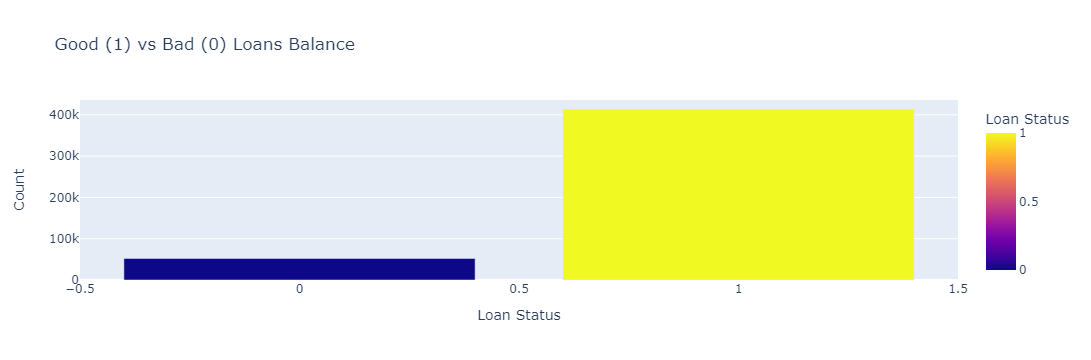

In [93]:
# Membandingkan jumlah pinjaman baik dan buruk (good and bad loans) dengan menggunakan Plotly Express.
df_vis = data_ml.good_bad_loan.value_counts().reset_index()
df_vis.columns = ['Loan Status', 'Count']

fig = px.bar(df_vis, x='Loan Status', y='Count', color='Loan Status', title='Good (1) vs Bad (0) Loans Balance',
            labels={'Loan Status':'Loan Status', 'Count':'Count'}, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()


In [94]:
data_ml.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad_loan
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0,466285.000000
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN,0.888081
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN,0.315267
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN,1.000000
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN,1.000000
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.0000

# EDA (Exploratory Data Analysis)

## Descriptive Statistics

In [95]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [96]:
# Deteksi tipe data kolom
kategorikal_cols = data_ml.select_dtypes(include=['object']).columns
numerikal_cols = data_ml.select_dtypes(exclude=['object']).columns

print("Kolom Kategorikal:")
print(kategorikal_cols)

print("\nKolom Numerik:")
print(numerikal_cols)

jumlah_kategorikal_cols = len(kategorikal_cols)
jumlah_numerikal_cols = len(numerikal_cols)

print("\nJumlah Kolom Kategorikal:", jumlah_kategorikal_cols)
print("Jumlah Kolom Numerik:", jumlah_numerikal_cols)

Kolom Kategorikal:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], dtype='object')

Kolom Numerik:
Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot

In [97]:
# Misahkah kolom nurerical dan kategorikal yang dianggap relevan untuk EDA
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'total_acc', 'revol_util',
                'mths_since_last_delinq', 'collections_12_mths_ex_med']

categorical_cols = ['term', 'grade', 'home_ownership', 'emp_length', 'pymnt_plan', 'purpose', 'title', 'verification_status']

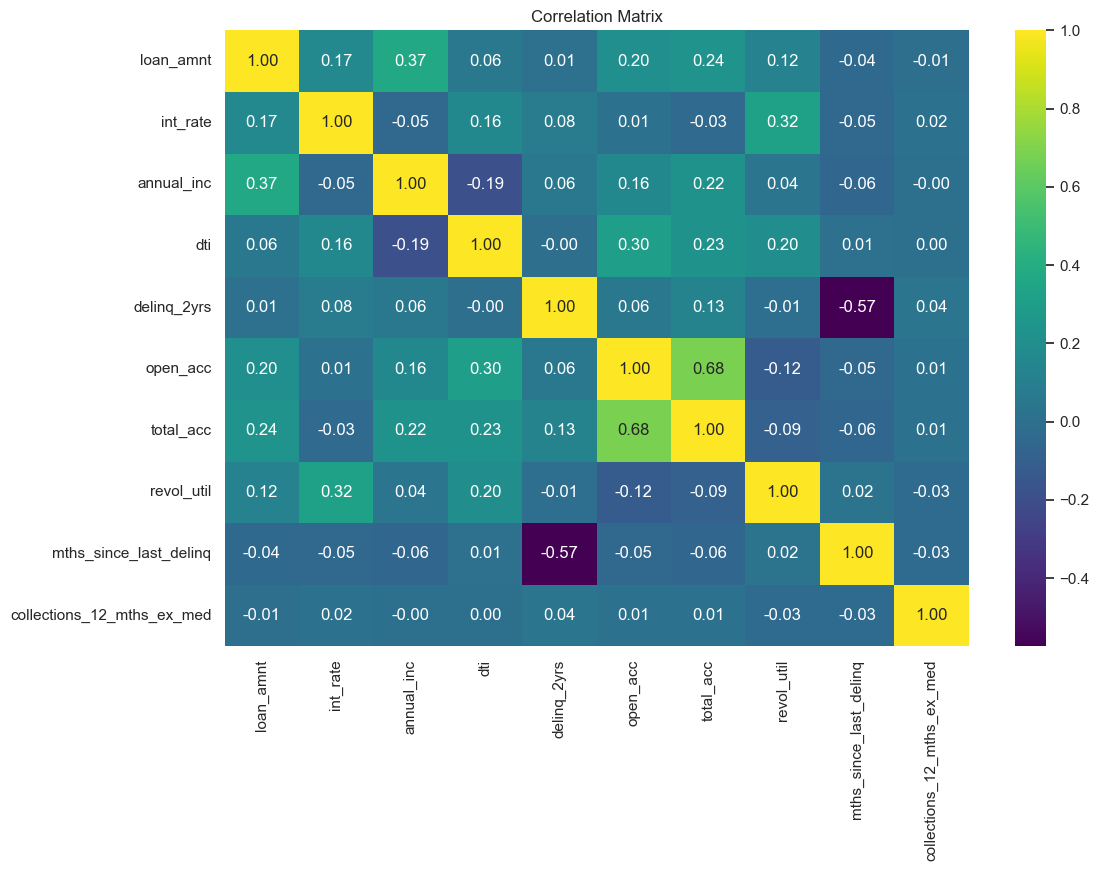

In [98]:
subset_df = data_ml[numerical_cols]

# Analisis Korelasi
correlation_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [99]:
# Melihat eskripsi kolom numerikal
subset_df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,total_acc,revol_util,mths_since_last_delinq,collections_12_mths_ex_med
count,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,465945.000000,215934.000000,466140.000000
mean,14317.277577,13.829236,7.327738e+04,17.218758,0.284678,11.187069,25.064430,56.176947,34.104430,0.009085
std,8286.509164,4.357587,5.496357e+04,7.851121,0.797365,4.987526,11.600141,23.732628,21.778487,0.108648
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.990000,4.500000e+04,11.360000,0.000000,8.000000,17.000000,39.200000,16.000000,0.000000
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,10.000000,23.000000,57.600000,31.000000,0.000000
75%,20000.000000,16.490000,8.896000e+04,22.780000,0.000000,14.000000,32.000000,74.700000,49.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,84.000000,156.000000,892.300000,188.000000,20.000000


In [100]:
# Mengevaluasi hubungan statistik antara variabel kategorikal dan variabel target
for col in categorical_cols:
    cross_tab = pd.crosstab(data_ml[col], data_ml['loan_status'])
    chi2, p, _, _ = chi2_contingency(cross_tab)
    print(f'Chi-Square Test for {col} vs loan_status:')
    print(f'Chi2 value: {chi2}')
    print(f'p-value: {p}\n')

Chi-Square Test for term vs loan_status:
Chi2 value: 14216.950986882766
p-value: 0.0

Chi-Square Test for grade vs loan_status:
Chi2 value: 20056.29769992114
p-value: 0.0

Chi-Square Test for home_ownership vs loan_status:
Chi2 value: 2996.9663827821996
p-value: 0.0

Chi-Square Test for emp_length vs loan_status:
Chi2 value: 2739.286208414691
p-value: 0.0

Chi-Square Test for pymnt_plan vs loan_status:
Chi2 value: 155.72336057186493
p-value: 1.2524486904293235e-29

Chi-Square Test for purpose vs loan_status:
Chi2 value: 11947.852944966911
p-value: 0.0

Chi-Square Test for title vs loan_status:
Chi2 value: 887039.8311283119
p-value: 0.0

Chi-Square Test for verification_status vs loan_status:
Chi2 value: 7546.378726469077
p-value: 0.0



In [101]:
data_ml['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

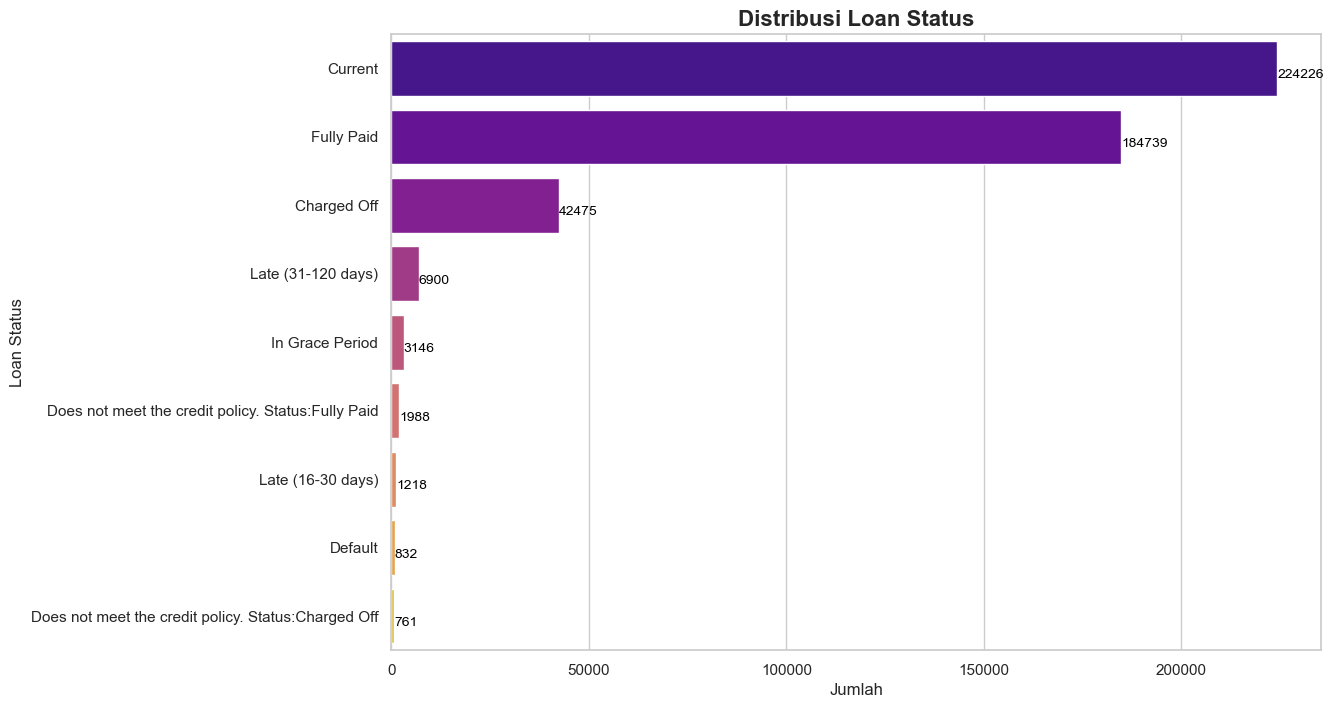

In [102]:
# Visualisasi distribusi nilai pada variabel target
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y='loan_status', data=data_ml, order=data_ml['loan_status'].value_counts().index, palette='plasma', ax=ax)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_x() + p.get_width(), p.get_y() + 0.5),
                ha='left', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Loan Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Jumlah', fontsize=12)
ax.set_ylabel('Loan Status', fontsize=12)

plt.show()

**Kesimpulan dari Descriptive Statistics**
1. Data terdiri dari 466285 baris dan 75 kolom
2. Mengasumsikan 18 kolom yang relevan untuk dilakukan EDA (8 kolom kategorikal, 10 kolom numerikal, dan 2 kolom datadate)
3. 10 kolom numerikal terdiri dari : loan_amnt, int_rate, annual_inc, dti, delinq_2yrs, open_acc, total_acc, revol_util, mths_since_last_delinq, collections_12_mths_ex_med
4. 8 kolom kategorikal, terdiri dari : term, grade, home_ownership, emp_length, pymnt_plan, purpose, title, verification_status

## Univariate Analysis & Multivariate Analysis

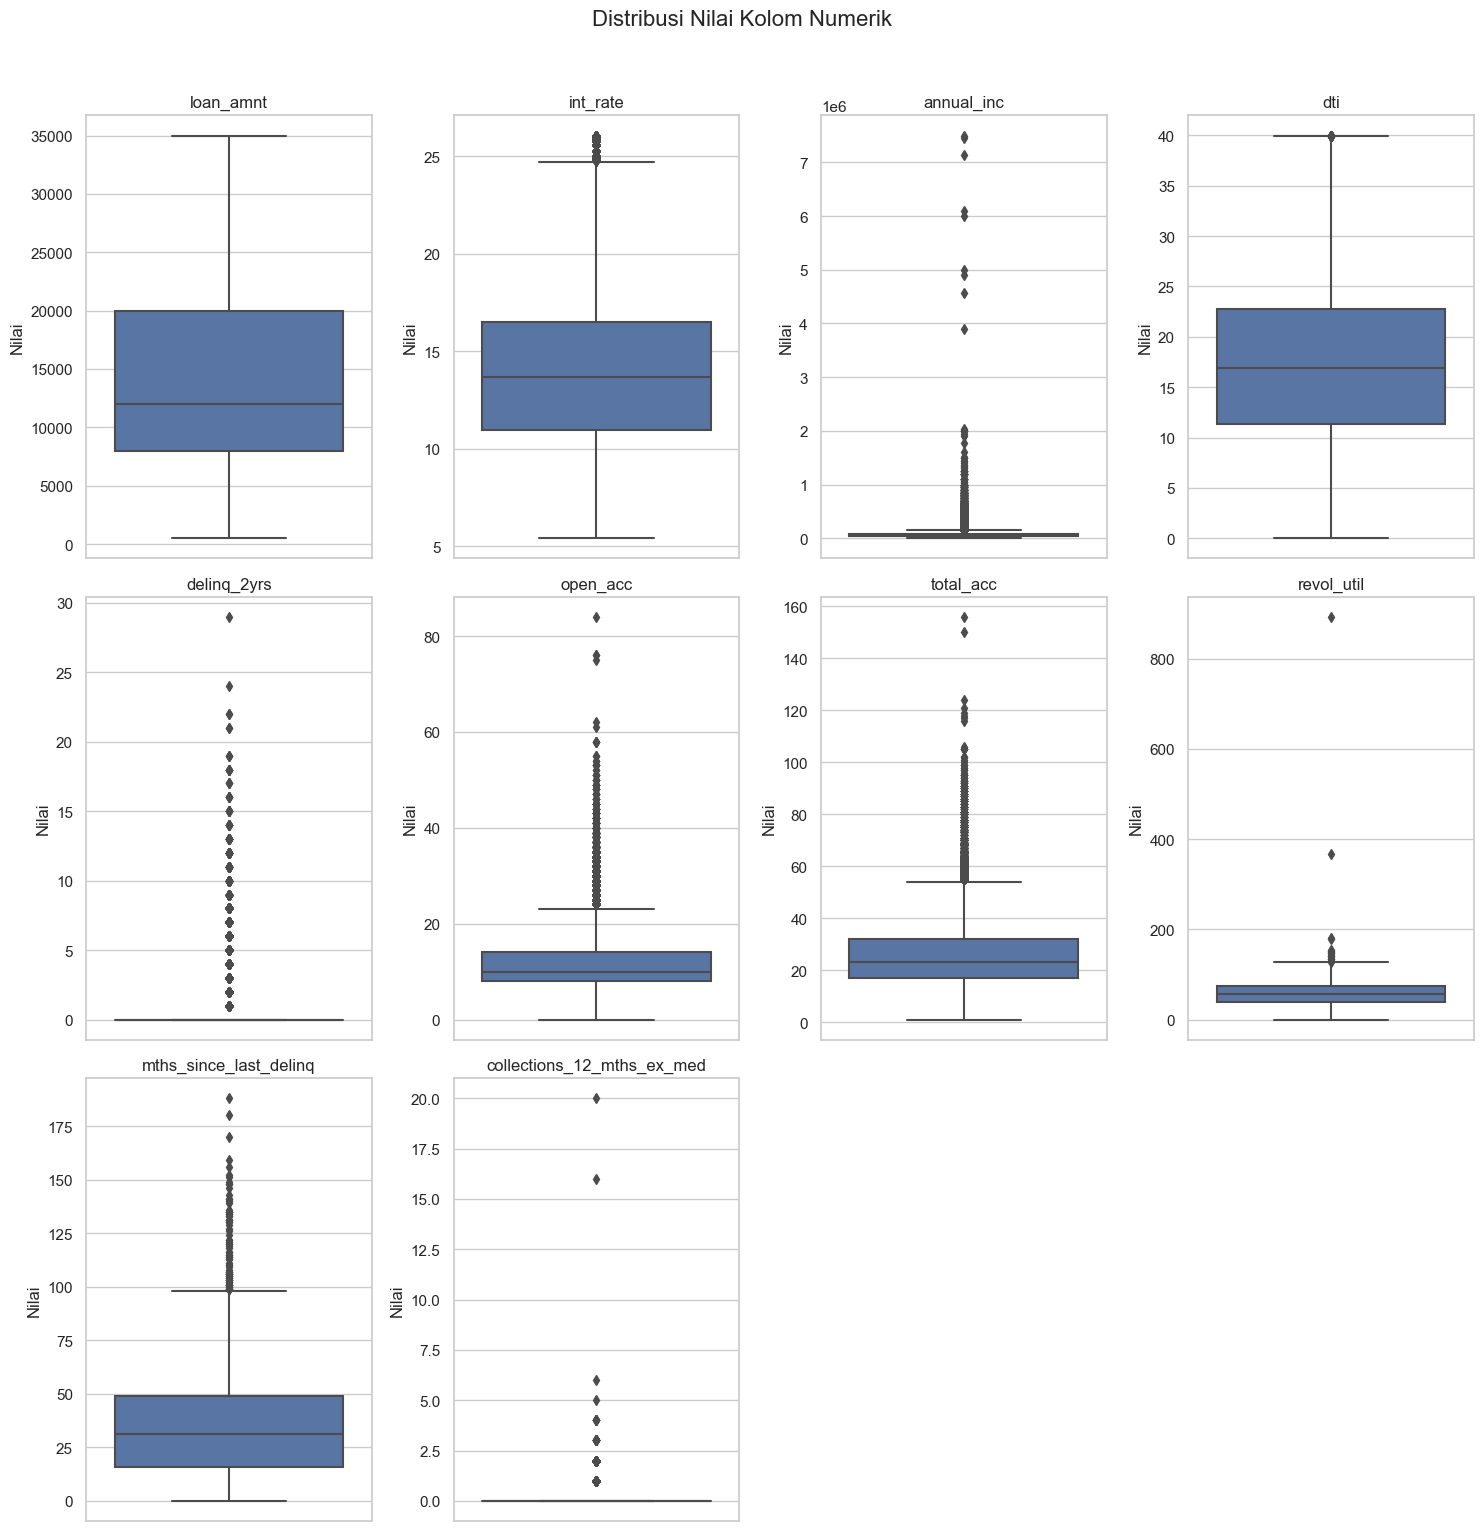

In [103]:
# analisis setiap kolom numerik untuk melihat distribusi nilai
features_nums = numerical_cols

n = len(features_nums)
ncols = 4 
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, feature in enumerate(features_nums):
    r = i // ncols
    c = i % ncols
    ax = axs[r, c]
    sns.boxplot(y=data_ml[feature], ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('Nilai')

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.suptitle('Distribusi Nilai Kolom Numerik', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

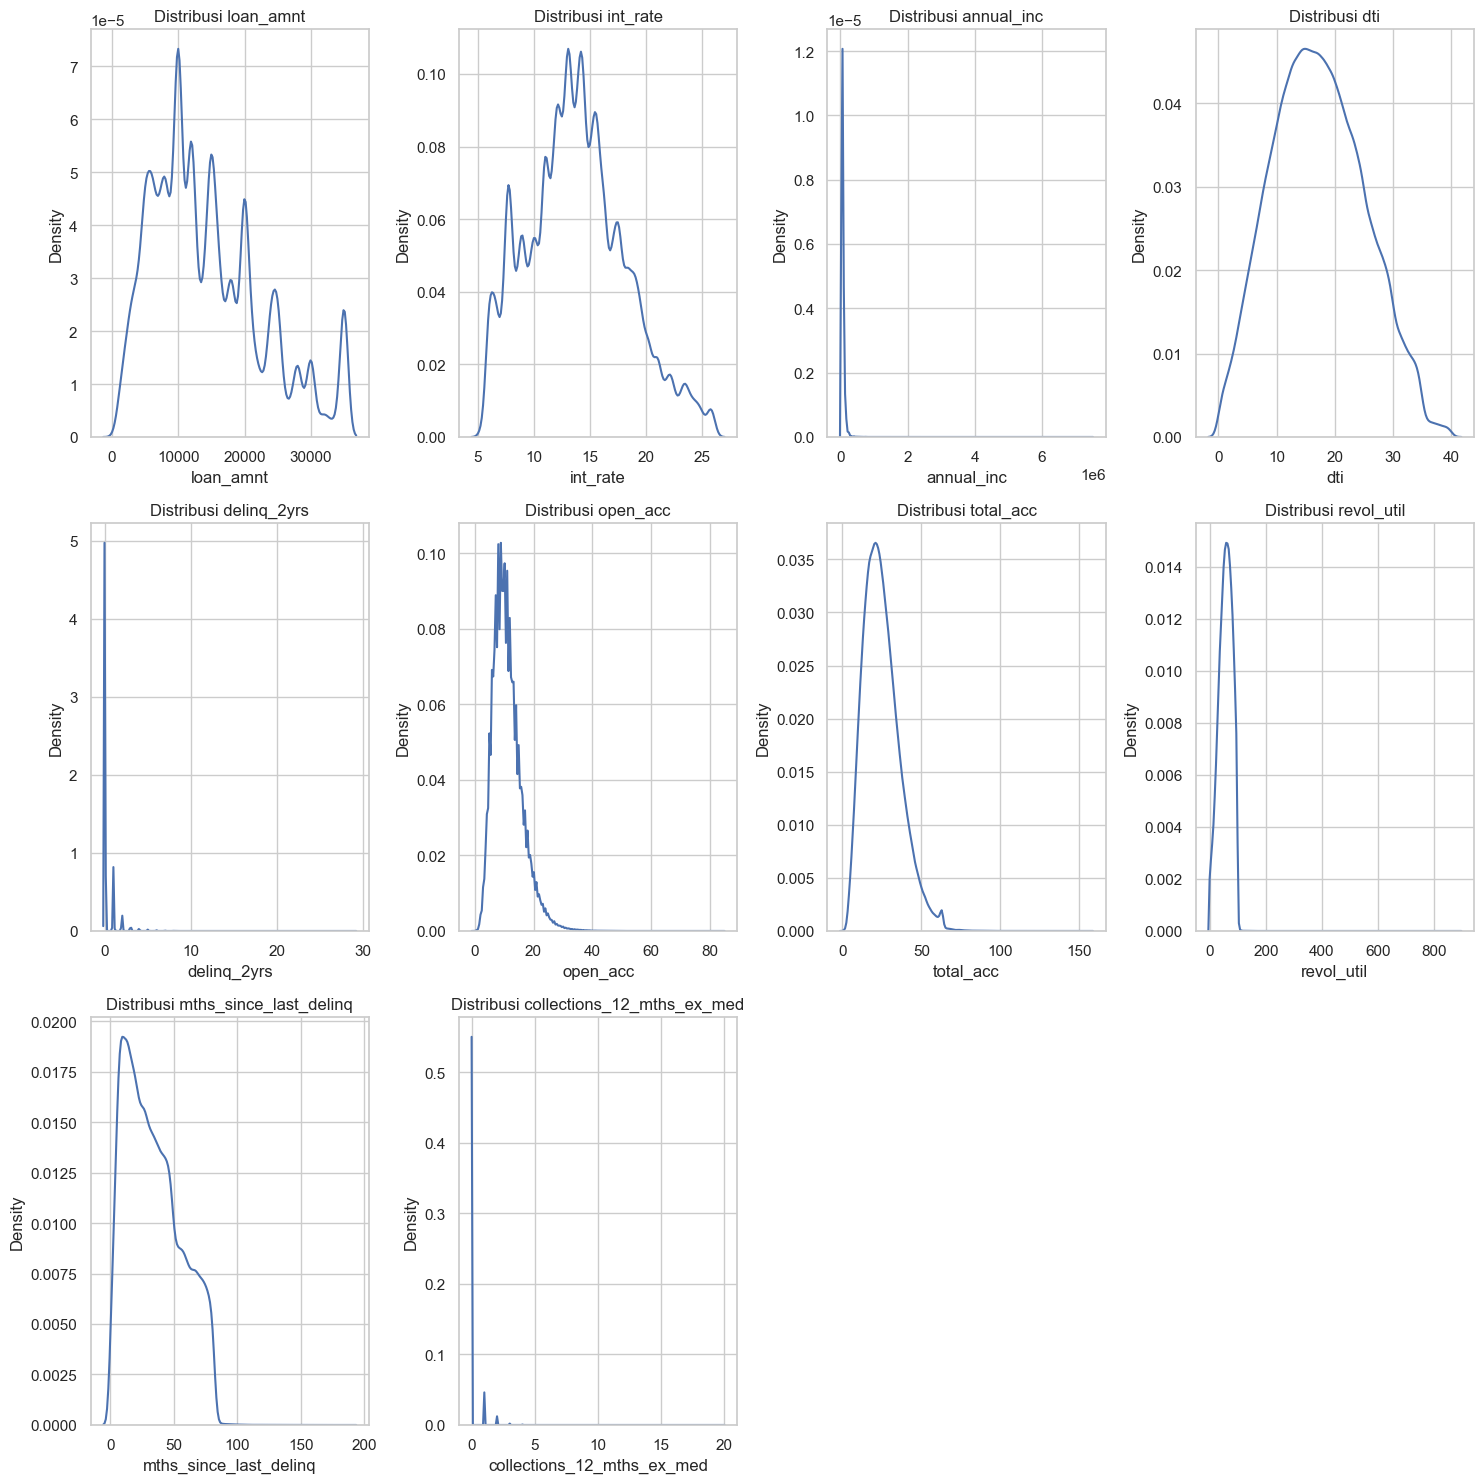

In [104]:
# Visualaliasi distribusi fitur-fitur numerik dalam features_nums
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, feature in enumerate(features_nums):
    r = i // ncols
    c = i % ncols
    ax = axs[r, c]
    sns.kdeplot(x=data_ml[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribusi {feature}') 

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

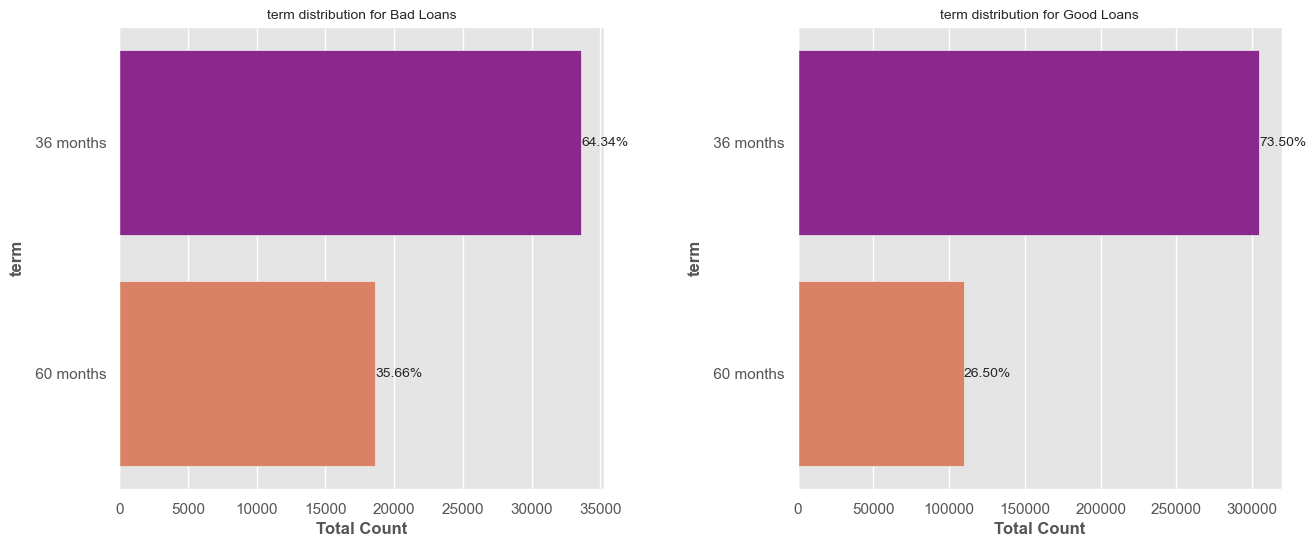

<Figure size 640x480 with 0 Axes>

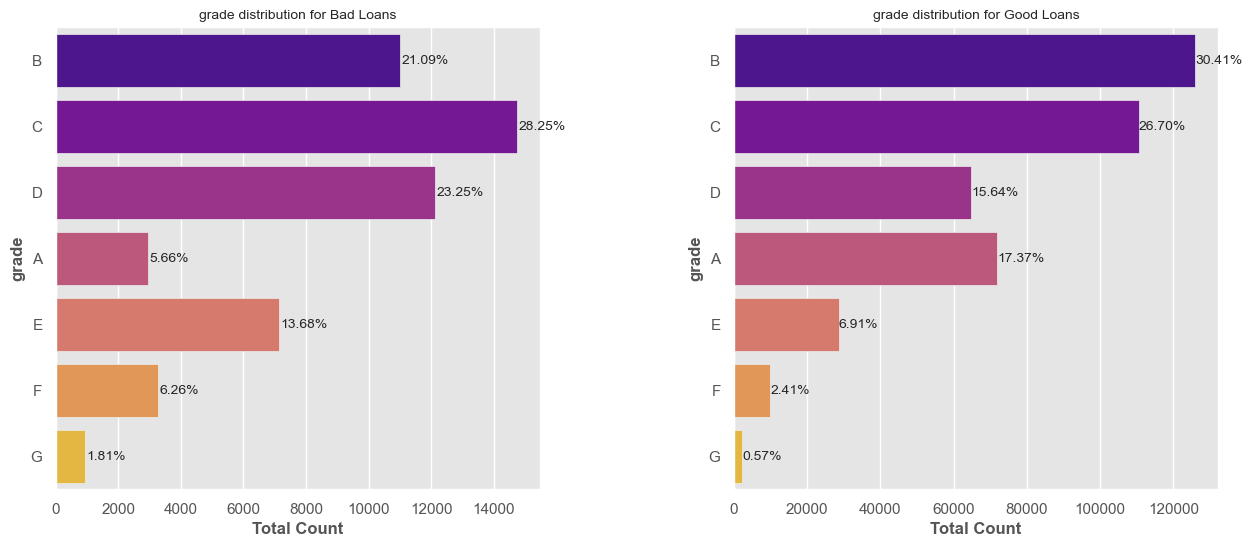

<Figure size 640x480 with 0 Axes>

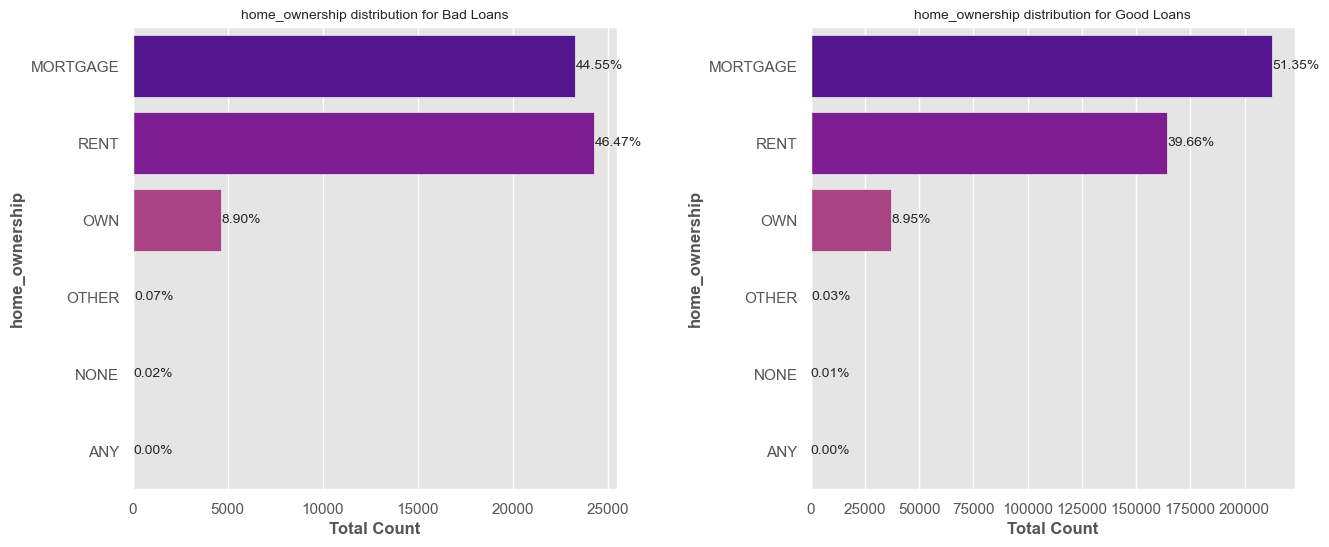

<Figure size 640x480 with 0 Axes>

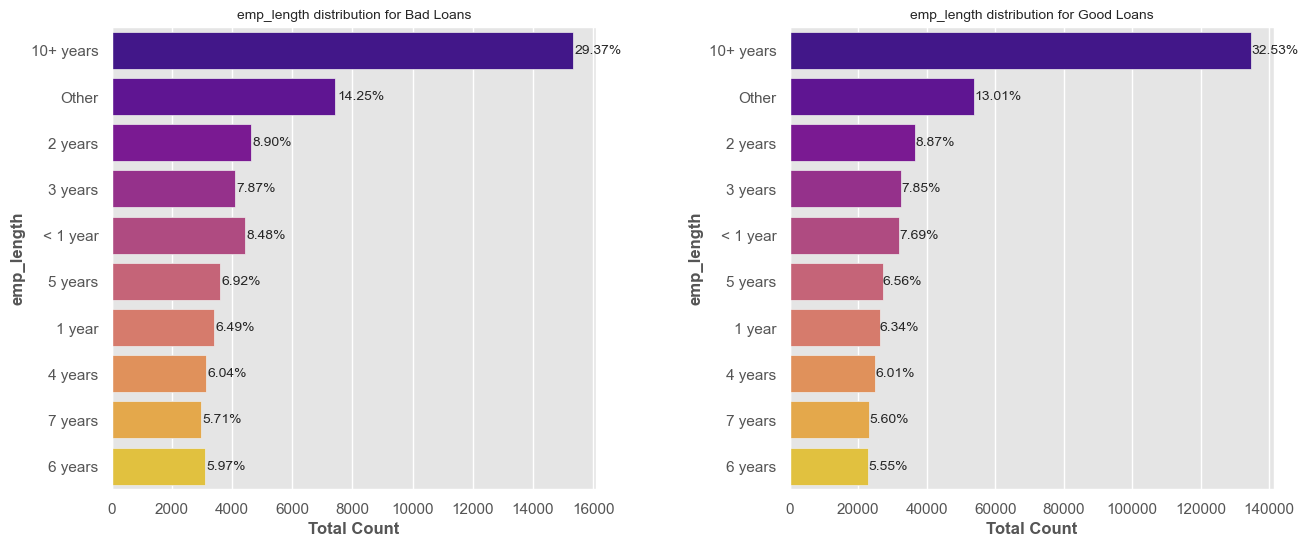

<Figure size 640x480 with 0 Axes>

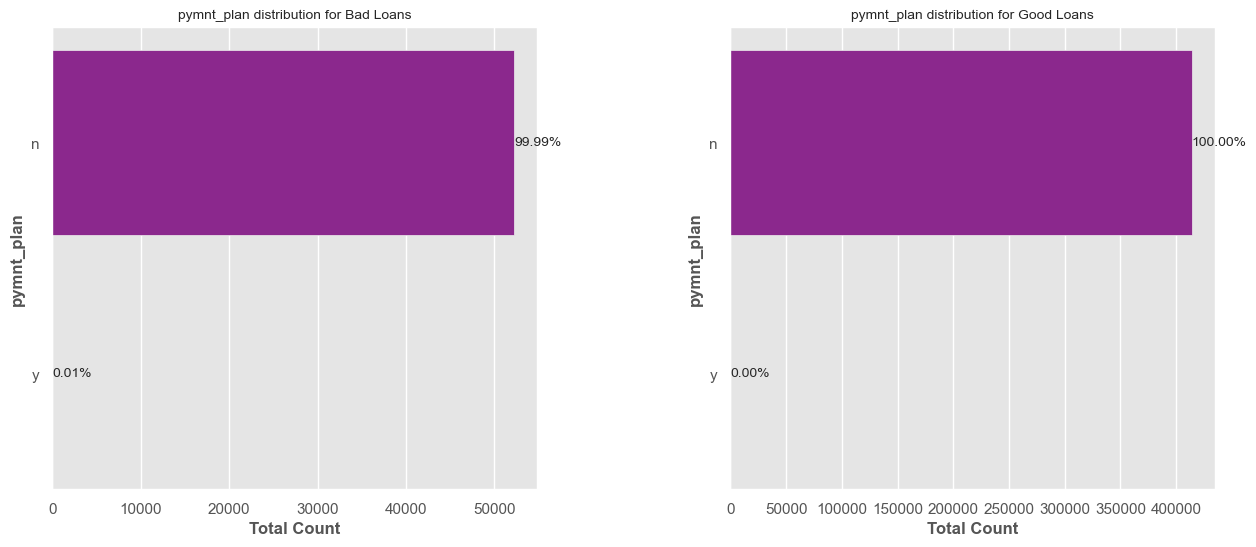

<Figure size 640x480 with 0 Axes>

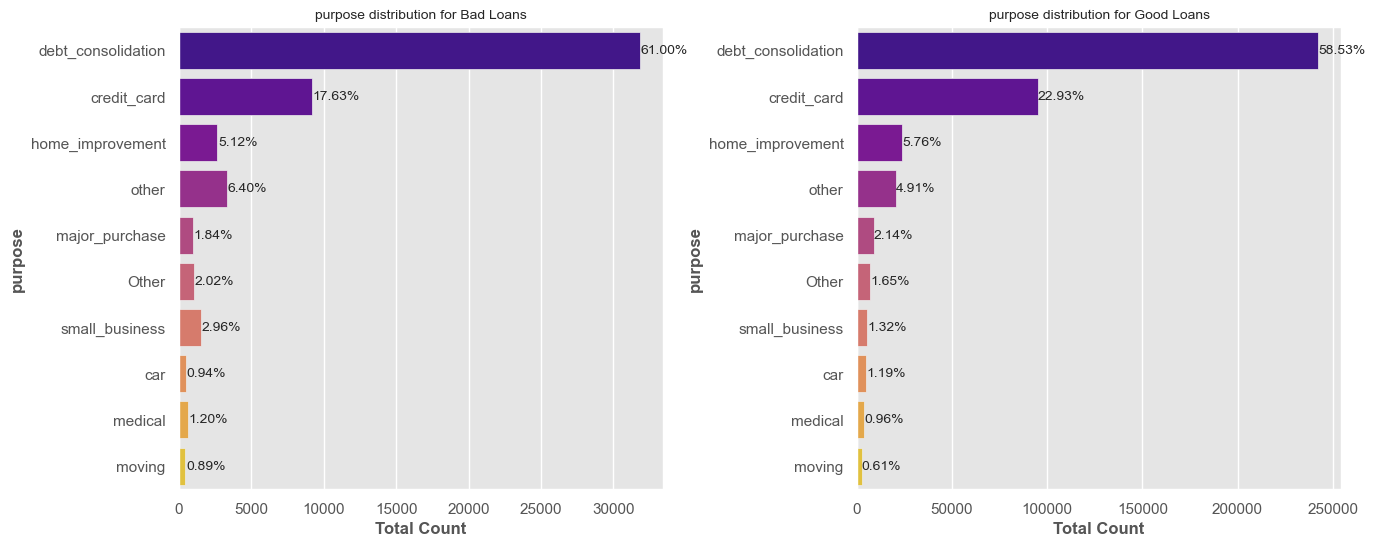

<Figure size 640x480 with 0 Axes>

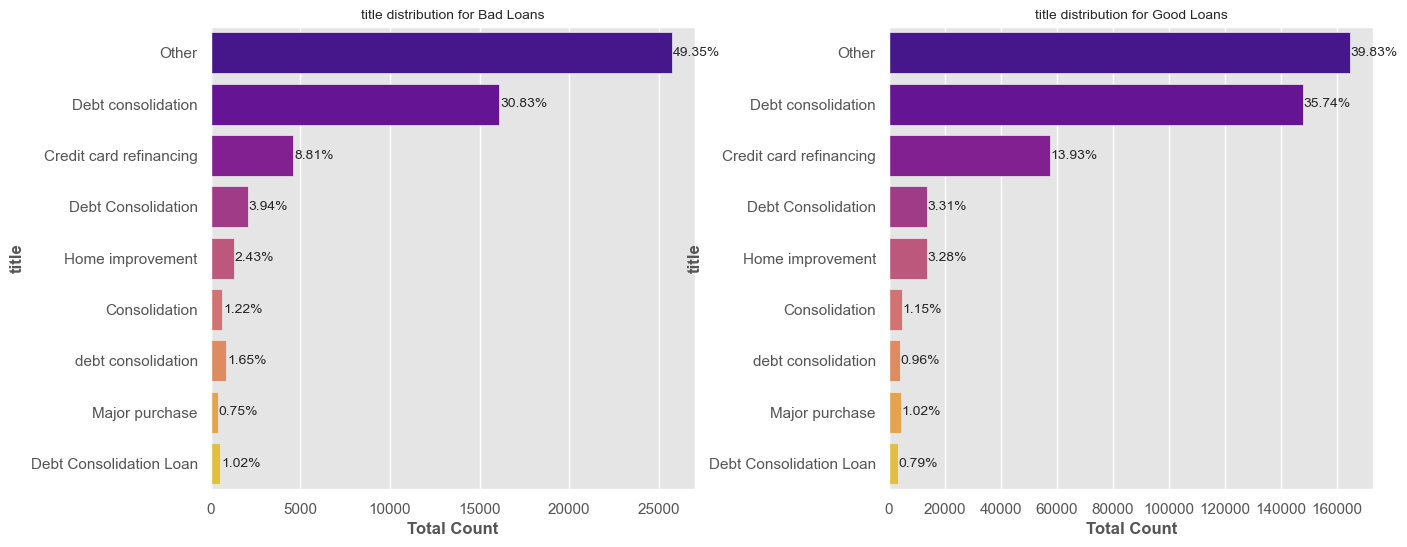

<Figure size 640x480 with 0 Axes>

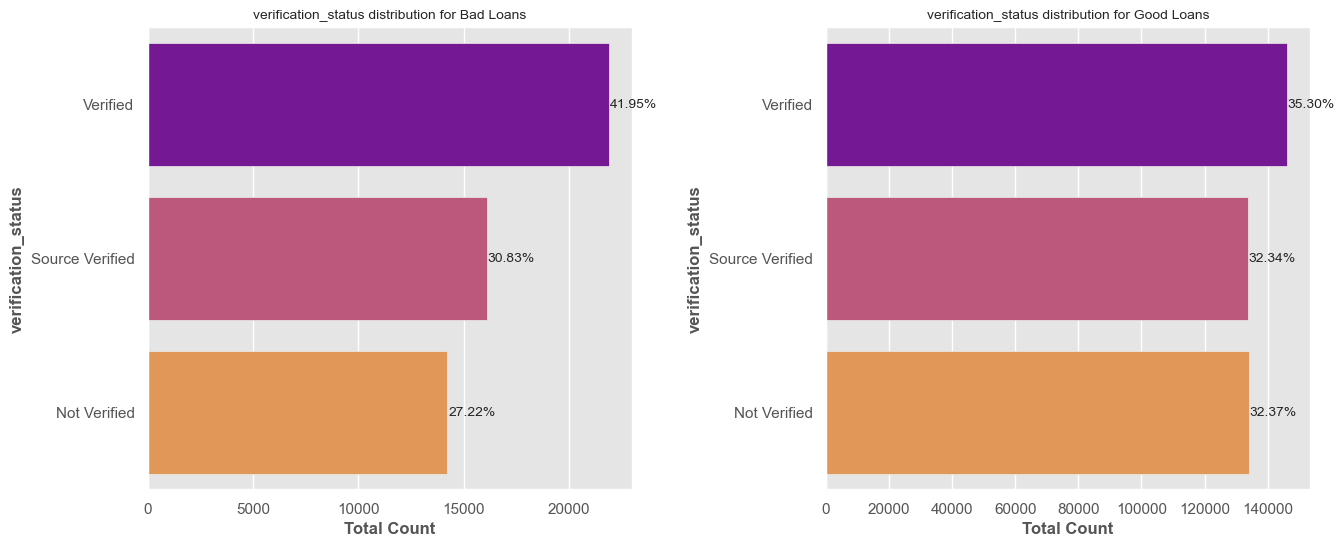

In [105]:
# Visualisasi Distribusi Kategori untuk Pinjaman yang baik dan buruk
def cat_plot(col, target, data, top_n=9):
    plt.style.use('ggplot')
    sns.despine()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    top_categories = data[col].value_counts().index[:top_n]

    data_top_n = data.copy()
    data_top_n.loc[~data_top_n[col].isin(top_categories), col] = 'Other'

    sns.countplot(y=col, data=data_top_n[data_top_n[target] == 0], ax=ax1, palette='plasma', order=data_top_n[col].value_counts().index)
    ax1.set_xlabel('Total Count', fontweight="bold")
    ax1.set_ylabel(f'{col}', fontweight="bold")
    ax1.set_title(f'{col} distribution for Bad Loans', fontsize=10)

    total_defaulters = len(data_top_n[data_top_n[target] == 0])
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_width() / total_defaulters) * 100),
                    (p.get_width() + 50, p.get_y() + p.get_height() / 2), va='center')

    sns.countplot(y=col, data=data_top_n[data_top_n[target] == 1], ax=ax2, palette='plasma', order=data_top_n[col].value_counts().index)
    ax2.set_xlabel('Total Count', fontweight="bold")
    ax2.set_ylabel(f'{col}', fontweight="bold")
    ax2.set_title(f'{col} distribution for Good Loans', fontsize=10)

    total_non_defaulters = len(data_top_n[data_top_n[target] == 1])
    for p in ax2.patches:
        ax2.annotate('{:.2f}%'.format((p.get_width() / total_non_defaulters) * 100),
                    (p.get_width() + 50, p.get_y() + p.get_height() / 2), va='center')

    plt.subplots_adjust(wspace=0.4, hspace=.3)
    plt.show()

cat_cols = categorical_cols

for col in cat_cols:
    cat_plot(col, 'good_bad_loan', data_ml)

Memisahkan pinjaman baik atau buruk dan membuat persentase masing-masing. Penting untuk memahami bagaimana distribusi kategori berbeda antara pinjaman baik dan buruk. Dengan membandingkan distribusi ini, kita dapat mendapatkan wawasan tentang fitur mana yang mungkin berpengaruh terhadap kualitas pinjaman. Misalnya, jika suatu kategori tertentu memiliki proporsi yang jauh lebih tinggi dalam pinjaman buruk dibandingkan dengan pinjaman baik, itu bisa menjadi indikasi bahwa kategori tersebut berpotensi menjadi faktor risiko.

In [106]:
# Mengubah tipe data kedalam datatime
data_ml['earliest_cr_yr'] = pd.to_datetime(data_ml['earliest_cr_line'], format = "%b-%y").dt.year.fillna(0).astype(int)
data_ml['issue_date'] = pd.to_datetime(data_ml['issue_d'], format = "%b-%y")

Mengubah data dan tipe data earliest_cr_line dan issue_d dilakukan untuk melihat tren jumlah peminjam baik dan buruk per tahun berdasarkan tanggal pembukaan kredit dan tanggal penerbitan pinjaman.

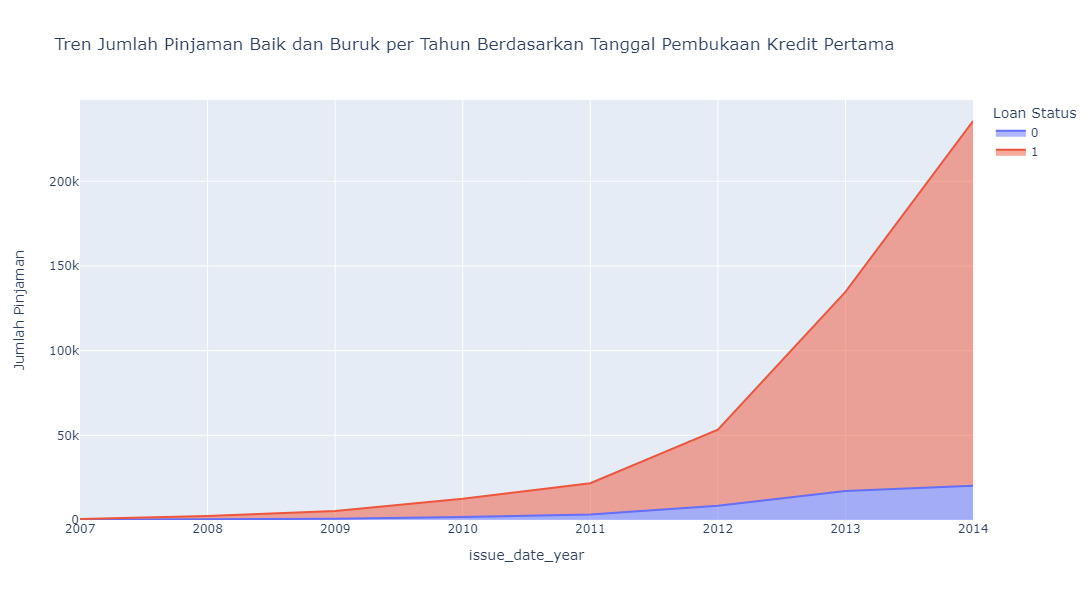

In [107]:
# Menghitung jumlah pinjaman baik dan buruk per tahun berdasarkan tanggal pembukaan kredit
data_ml['issue_date_year'] = data_ml['issue_date'].dt.year

loan_counts = data_ml.groupby(['issue_date_year', 'good_bad_loan']).size().unstack(fill_value=0)
loan_counts.index = loan_counts.index.astype(str)
loan_counts_long = loan_counts.reset_index().melt(id_vars='issue_date_year', var_name='Loan Status', value_name='Jumlah Pinjaman')

fig = px.area(loan_counts_long, x='issue_date_year', y='Jumlah Pinjaman', color='Loan Status', title='Tren Jumlah Pinjaman Baik dan Buruk per Tahun Berdasarkan Tanggal Pembukaan Kredit Pertama', height=600)
fig.show()

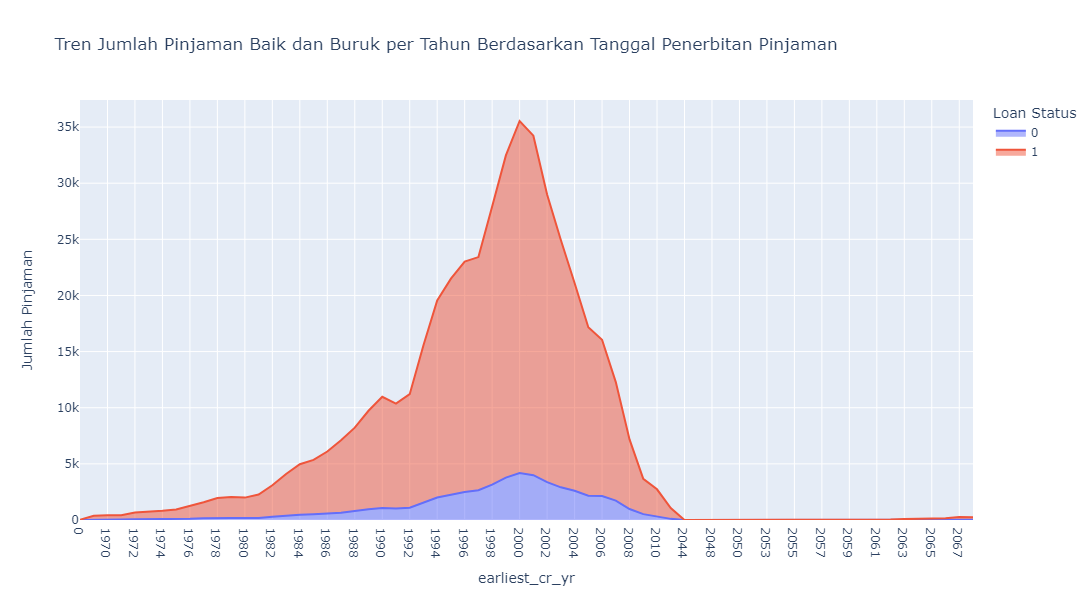

In [108]:
# Hitung jumlah pinjaman baik dan buruk per tahun berdasarkan tanggal penerbitan pinjaman
loan_counts = data_ml.groupby(['earliest_cr_yr', 'good_bad_loan']).size().unstack(fill_value=0)
loan_counts.index = loan_counts.index.astype(str)
loan_counts_long = loan_counts.reset_index().melt(id_vars='earliest_cr_yr', var_name='Loan Status', value_name='Jumlah Pinjaman')

fig = px.area(loan_counts_long, x='earliest_cr_yr', y='Jumlah Pinjaman', color='Loan Status', title='Tren Jumlah Pinjaman Baik dan Buruk per Tahun Berdasarkan Tanggal Penerbitan Pinjaman', height=600)
fig.show()

## Bisnis Insight
- **Verifikasi Status**

    Proporsi pinjaman yang diverifikasi (baik itu Verified atau Source Verified) cenderung lebih tinggi pada pinjaman buruk dibandingkan dengan pinjaman baik (Verified: 41.91%, Source Verified: 30.83). Sebaliknya, proporsi pinjaman yang tidak diverifikasi cenderung lebih tinggi pada pinjaman baik. 

- **Issue Date Year**

    Berdasakan Berdasarkan Tanggal Pembukaan Kredit Pertama, sejak tahun 2011 jumlah pinjaman mengalami kenaikan lebih dari dua kali lipat setiap tahunnya dan angka bad loan-pun masih terkendali.

- **Home Ownership**

    Individu yang menyewa rumah (Rent) cenderung lebih tinggi pada pinjaman buruk (46.57%), sedangkan proporsi individu yang memiliki hipotek (Mortgage) cenderung lebih tinggi pada pinjaman baik (51.35%).

- **Term**

    Proporsi pinjaman dengan durasi 36 bulan cenderung lebih tinggi pada pinjaman baik (74.50%), sedangkan proporsi pinjaman dengan durasi 60 bulan cenderung lebih tinggi pada pinjaman buruk (35.66%).

- **Grade**

    Menunjukkan semakain rendah nilai pinjaman seseorang maka semakin berisiko

# Data Preprocessing

**Menghapus kolom dengan lebih dari 70% data null**

- *Kualitas Data :* Kolom dengan sejumlah besar data yang hilang mungkin tidak memberikan informasi yang cukup untuk pembelajaran mesin.
- *Bias :* Jika kita mencoba mengisi data yang hilang dengan beberapa metode imputasi, ada risiko besar bahwa kita mungkin memasukkan bias ke dalam data kita.
- *Kerumitan Model :* Menghapus kolom dengan banyak data yang hilang dapat membantu mengurangi dimensi data dan dapat membantu mencegah overfitting.

Ambang batas 70% mungkin dipilih sebagai titik keseimbangan antara mempertahankan sebanyak mungkin informasi dan menghindari noise atau bias yang mungkin dihasilkan oleh data yang hilang.

In [109]:
# Identifikasi dan Filtrasi Kolom dengan Lebih dari 70% Data Null
missing_values = data_ml.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [110]:
columns_to_drop = ['Unnamed: 0', 'id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                'recoveries', 'issue_d',  'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'policy_code', 'issue_date_year', 'loan_status', 'earliest_cr_line']
data_ml.drop(columns=columns_to_drop, inplace=True, axis=1)

data_ml.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10660\2235739819.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\USER\AppData\Local\Temp\ipykernel_10660\2235739819.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

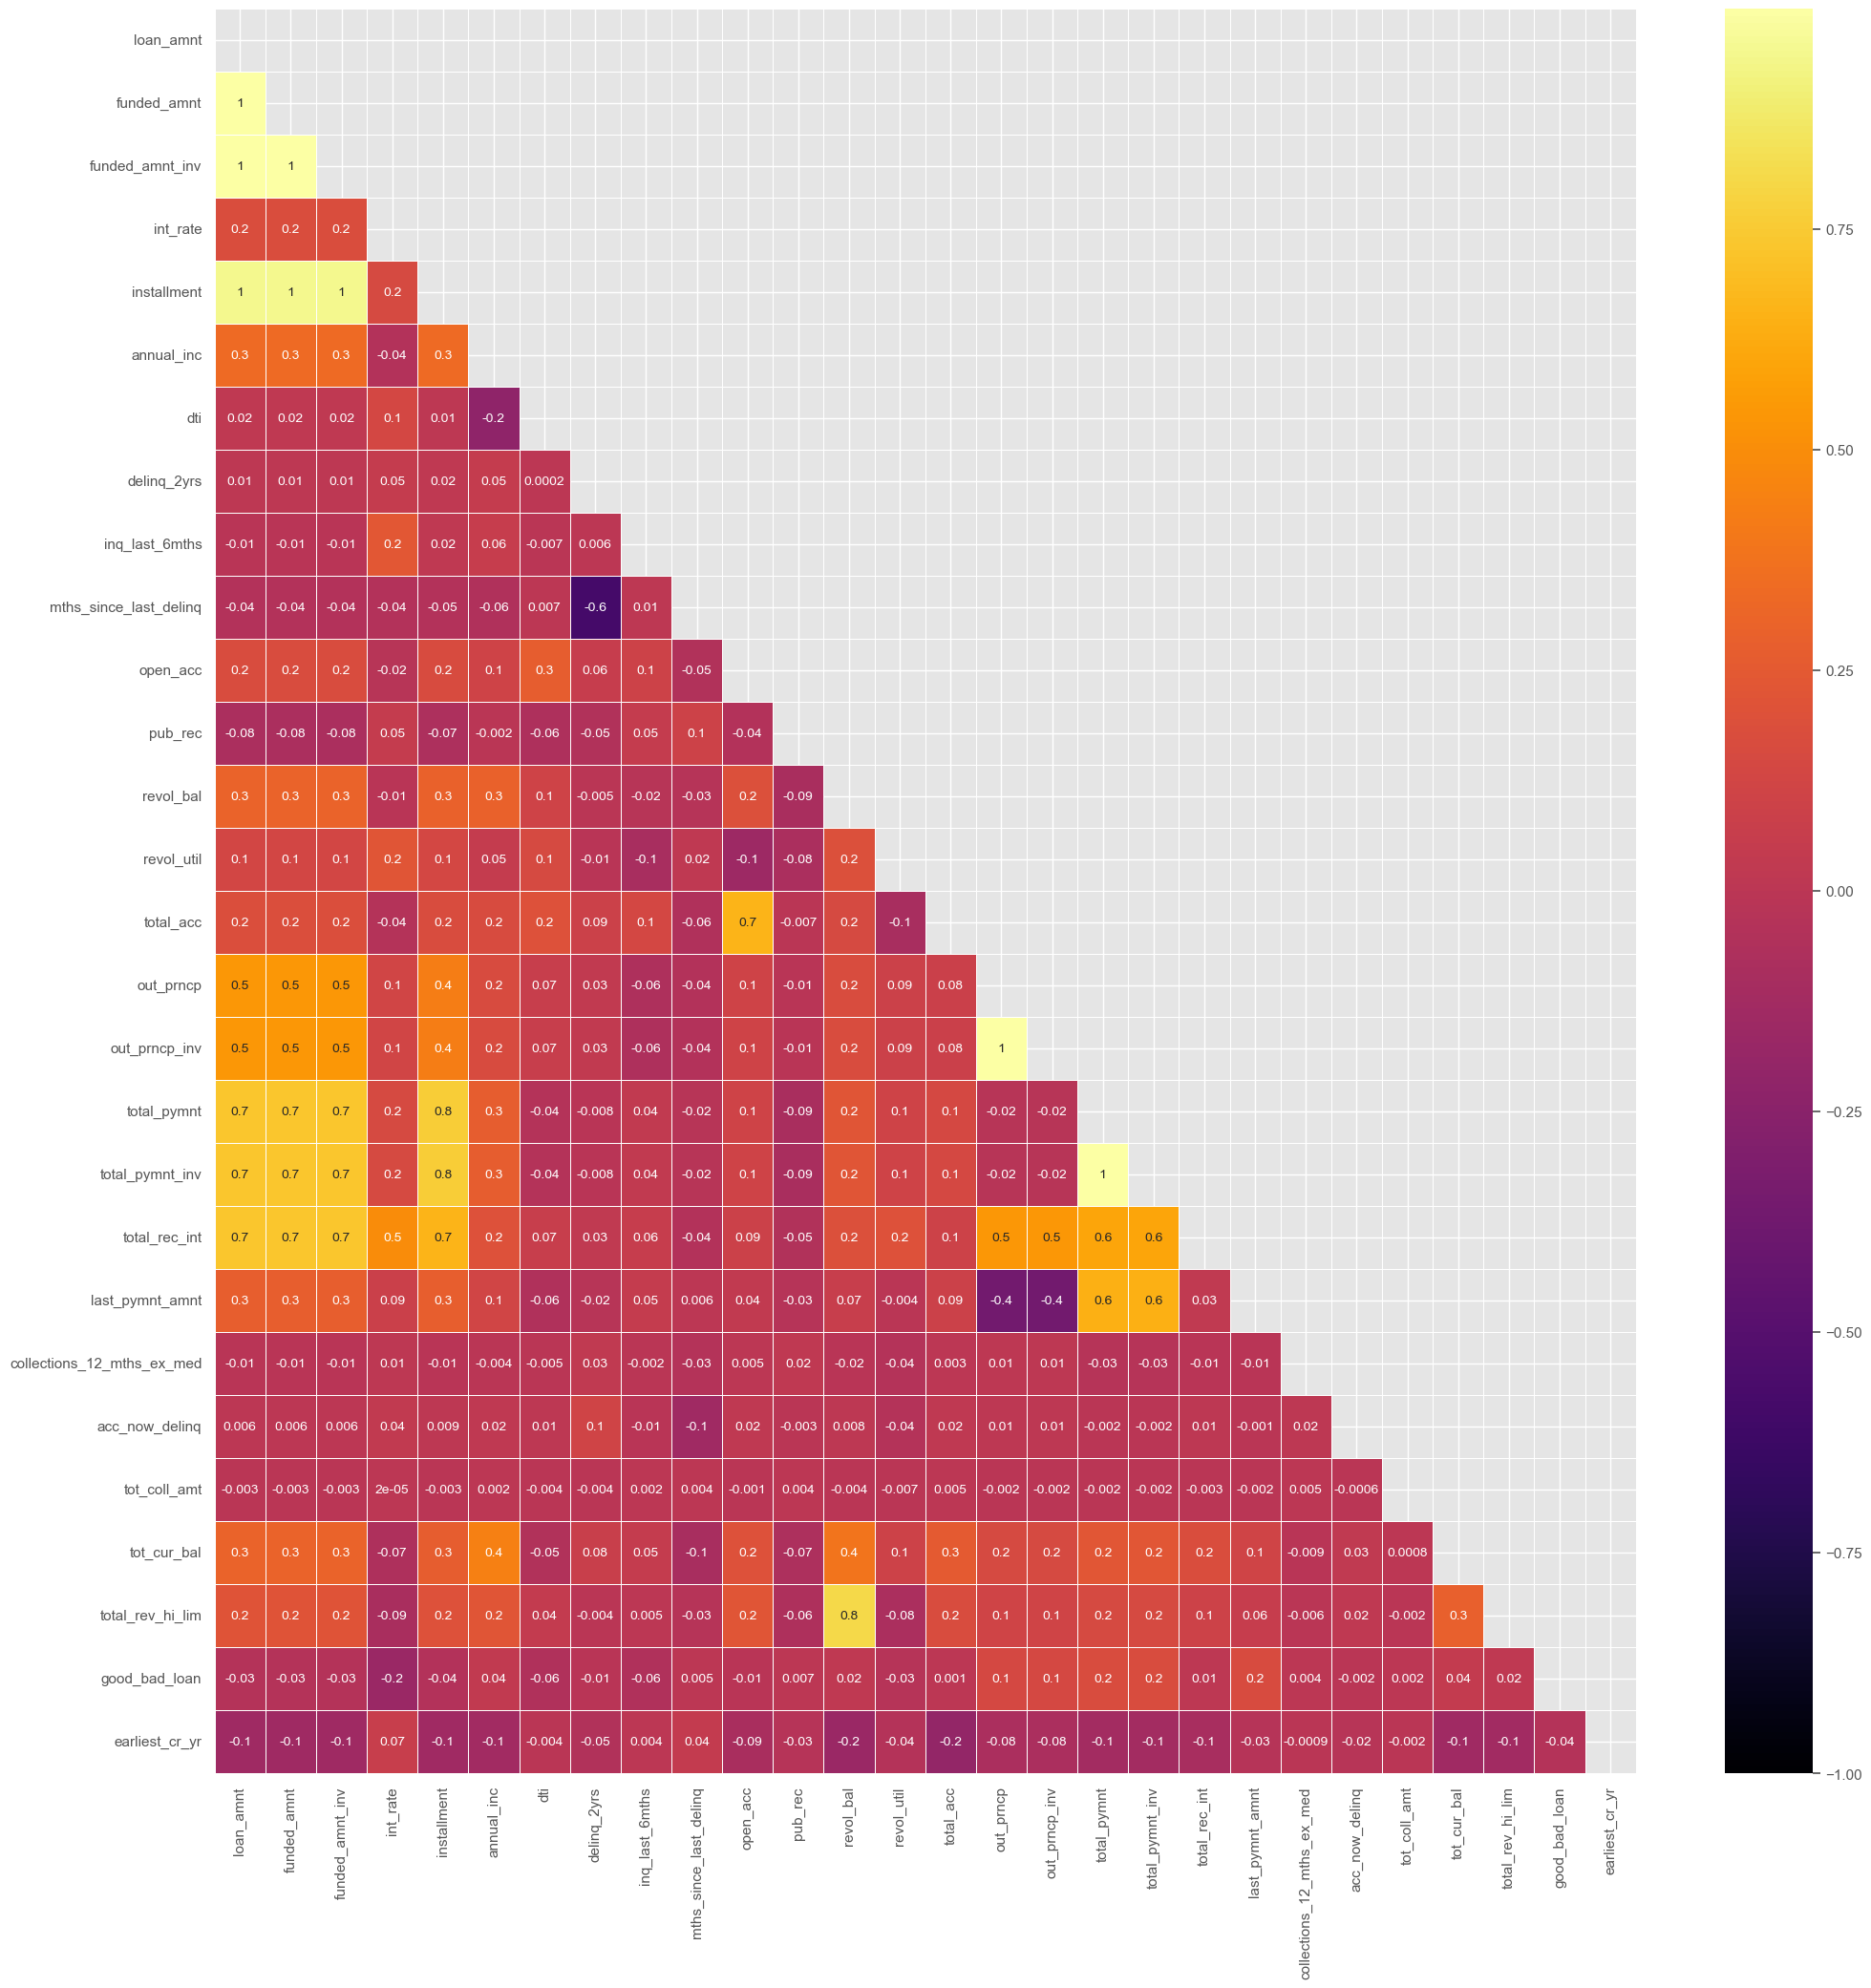

In [111]:
# Visualisasi Korelasi Matriks
mask = np.zeros_like(data_ml.corr().fillna(0), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data_ml.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [112]:
# Menghapus kolom yang memiliki korelasi kuat
data_ml.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

In [113]:
# Check data null
data_ml.isnull().sum()

term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_util                    0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
good_bad_loan                 0
earliest

Mengubah tipe data term dan emp_length

In [114]:
term_values = {' 36 months': 36, ' 60 months': 60}
data_ml['term'] = data_ml.term.map(term_values)

In [115]:
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
emp_length_convert(data_ml, 'emp_length')

data_ml['emp_length'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_10660\1011013654.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9], dtype=int64)

In [116]:
# Mengubah kolom tanggal menjadi masa dalam bulan
def date_columns(df, column):
    
    today_date = pd.to_datetime('2020-08-01')
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    df.drop(columns = [column], inplace = True)
    
date_columns(data_ml, 'issue_date')
date_columns(data_ml, 'last_pymnt_d')
date_columns(data_ml, 'last_credit_pull_d')

IV dan WoE adalah metrik yang umum digunakan dalam analisis kredit untuk menilai kekuatan prediktif variabel independen terhadap variabel target.

- *Information Value (IV):* Mengukur seberapa baik suatu variabel dapat membedakan antara dua kelas dalam variabel target. Semakin tinggi nilai IV, semakin baik variabel tersebut dalam memprediksi variabel target.

- *Weight of Evidence (WoE):* Mengukur kekuatan hubungan antara variabel independen dan variabel target. WoE menggambarkan perubahan logaritmik dalam odds antara dua kelas variabel target.

In [117]:
# Implementasikan perhitungan Information Value (IV) dan Weight of Evidence (WoE) untuk setiap variabel independen dalam dataset.
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    # Run WoE and IV
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is : " + str(round(d['IV'].sum(),6)))
        temp = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(data_ml, target='good_bad_loan', bins=20)

Information value of term is : 0.035331
Information value of int_rate is : 0.342658
Information value of grade is : 0.280322
Information value of emp_length is : 0.007239
Information value of home_ownership is : 0.016678
Information value of annual_inc is : 0.036486
Information value of verification_status is : 0.033189
Information value of pymnt_plan is : 0.000294
Information value of purpose is : 0.028835
Information value of addr_state is : 0.010225
Information value of dti is : 0.040485
Information value of delinq_2yrs is : 0.001209
Information value of inq_last_6mths is : 0.039326
Information value of mths_since_last_delinq is : 0.002684
Information value of open_acc is : 0.004182
Information value of pub_rec is : 0.00032
Information value of revol_util is : 0.009051
Information value of initial_list_status is : 0.010038
Information value of out_prncp is : 0.595863
Information value of total_pymnt is : 0.492059
Information value of total_rec_int is : 0.008638
Information value of 

Aturan umum menyatakan bahwa semua variabel dengan IV < 0,02 tidak berguna untuk prediksi dan IV > 0,5 memiliki kekuatan prediksi yang mencurigakan. Oleh karena itu, variabel berikut tidak akan dimasukkan: pymnt_plan, last_pymnt_amnt, revol_util, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec,  collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt, mths_since_last_pymnt_d, emp_length, application_type.

In [118]:
data_ml.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                    'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                    'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [119]:
data_ml.head()

,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,initial_list_status,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,good_bad_loan,earliest_cr_yr,mths_since_issue_date,mths_since_last_credit_pull_d
42537,36,6.62,A,MORTGAGE,105000.0,Not Verified,debt_consolidation,CT,14.05,1.0,w,4266.62,8842.80,1109.42,267646.0,61100.0,1,1994,80.0,55.0
42538,36,13.53,B,RENT,40000.0,Source Verified,debt_consolidation,NM,16.94,0.0,w,0.00,13359.77,1359.78,13605.0,8100.0,1,1998,80.0,55.0
42539,36,8.90,A,MORTGAGE,63000.0,Not Verified,debt_consolidation,FL,16.51,0.0,w,5449.27,11431.20,1880.47,272492.0,15400.0,1,1998,80.0,55.0
42541,36,12.85,B,RENT,88000.0,Not Verified,debt_consolidation,NC,10.02,0.0,f,5274.10,11296.94,2571.04,17672.0,4500.0,1,1988,80.0,55.0
42543,36,9.67,B,MORTGAGE,102000.0,Not Verified,debt_consolidation,MA,15.55,0.0,f,3659.12,7706.81,1365.93,39143.0,22300.0,1,1989,80.0,55.0


## Feature Transformation

Skewness: 0.9398193723577272


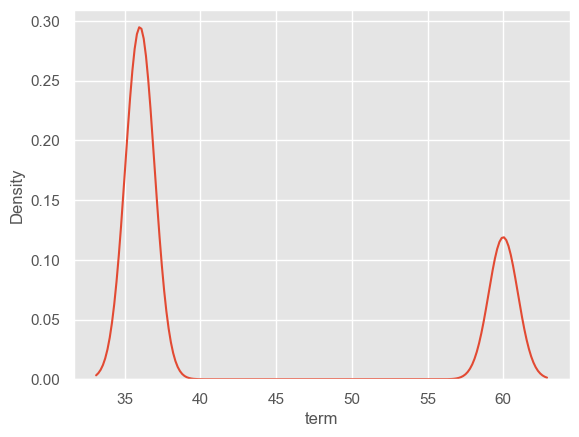

In [120]:
# Cek Skewness untuk melihat ke arah mana distribusi nya
sns.kdeplot(data_ml['term'])
skewness = skew(data_ml['term'])
print(f"Skewness: {skewness}")

Skewness: 0.34340897888787963


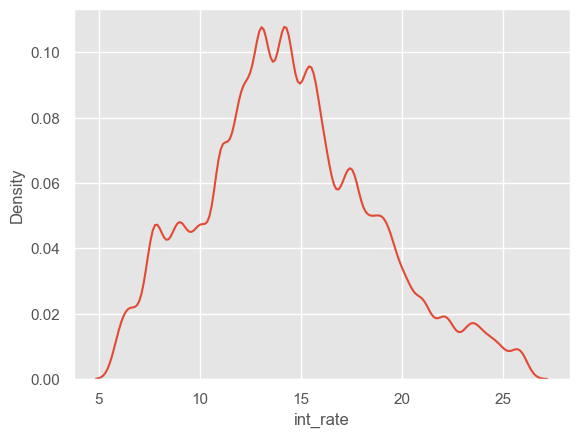

In [121]:
sns.kdeplot(data_ml['int_rate'])
skewness = skew(data_ml['int_rate'])
print(f"Skewness: {skewness}")

Skewness: 37.44304132348704


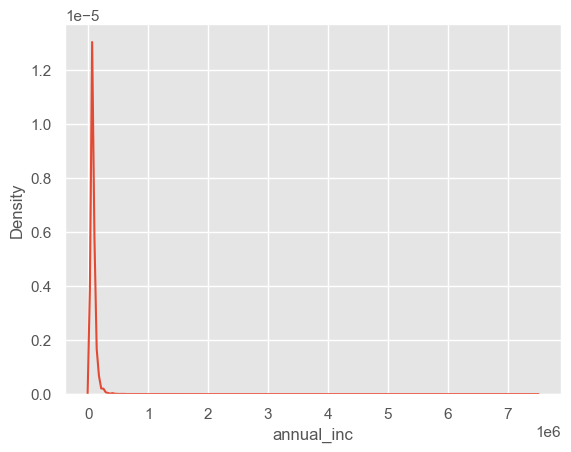

In [122]:
sns.kdeplot(data_ml['annual_inc'])
skewness = skew(data_ml['annual_inc'])
print(f"Skewness: {skewness}")

Skewness: 0.23390300864017052


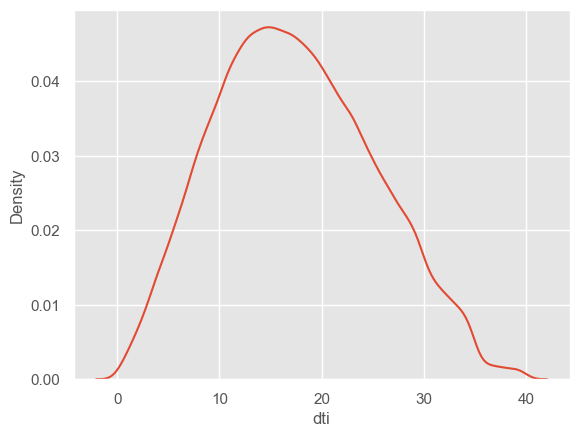

In [123]:
sns.kdeplot(data_ml['dti'])
skewness = skew(data_ml['dti'])
print(f"Skewness: {skewness}")

Skewness: 1.4988926124362851


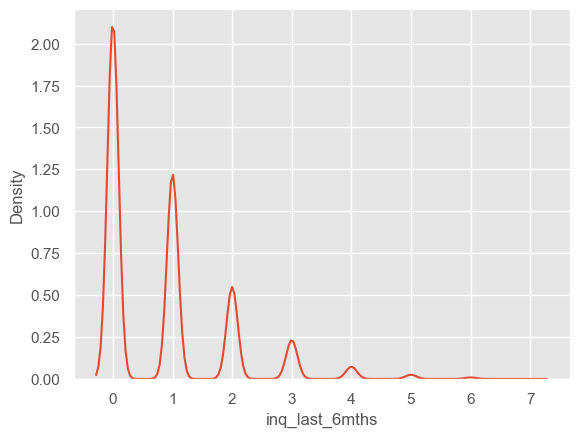

In [124]:
sns.kdeplot(data_ml['inq_last_6mths'])
skewness = skew(data_ml['inq_last_6mths'])
print(f"Skewness: {skewness}")

Skewness: 1.3504344610940968


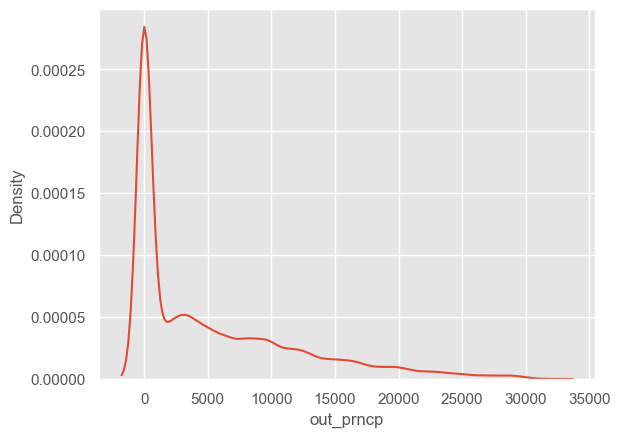

In [125]:
sns.kdeplot(data_ml['out_prncp'])
skewness = skew(data_ml['out_prncp'])
print(f"Skewness: {skewness}")

Skewness: 2.160889063604444


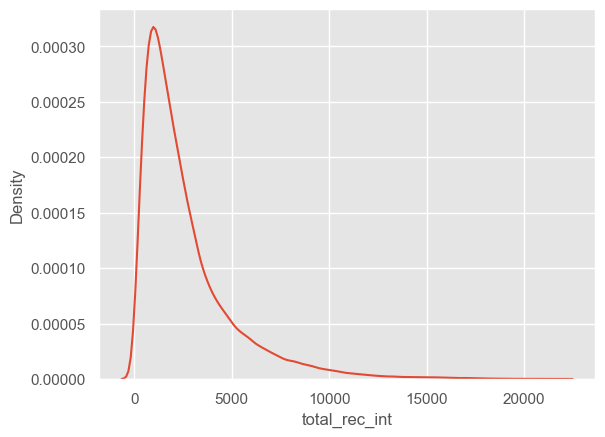

In [126]:
sns.kdeplot(data_ml['total_rec_int'])
skewness = skew(data_ml['total_rec_int'])
print(f"Skewness: {skewness}")

Skewness: 3.4030109194819227


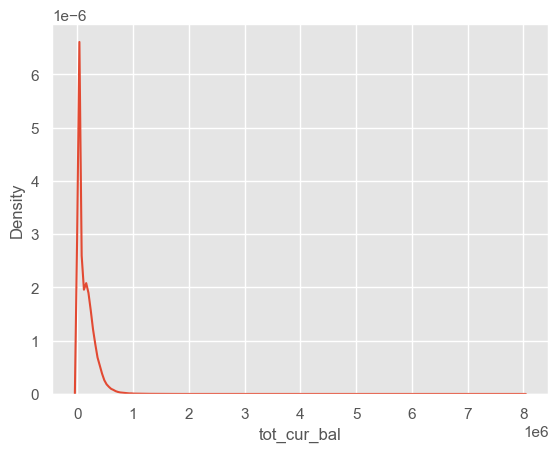

In [127]:
sns.kdeplot(data_ml['tot_cur_bal'])
skewness = skew(data_ml['tot_cur_bal'])
print(f"Skewness: {skewness}")

Skewness: 144.53821089031246


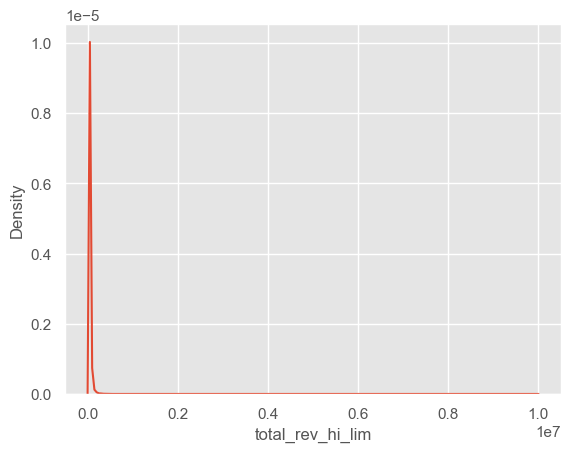

In [128]:
sns.kdeplot(data_ml['total_rev_hi_lim'])
skewness = skew(data_ml['total_rev_hi_lim'])
print(f"Skewness: {skewness}")

Skewness: 0.8505533239452667


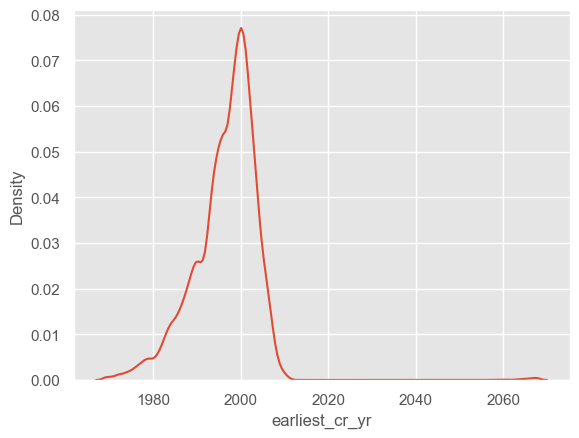

In [129]:
sns.kdeplot(data_ml['earliest_cr_yr'])
skewness = skew(data_ml['earliest_cr_yr'])
print(f"Skewness: {skewness}")

Skewness: 0.5961042733833791


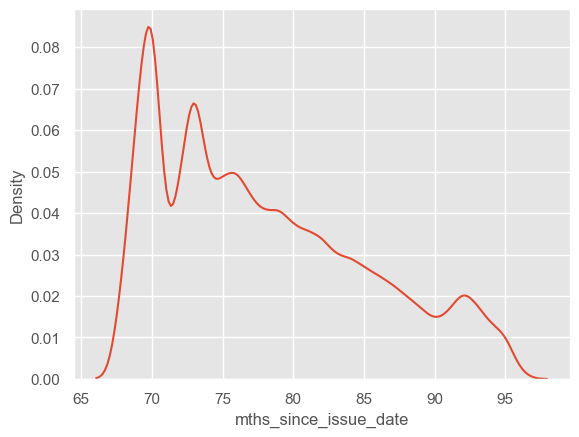

In [130]:
sns.kdeplot(data_ml['mths_since_issue_date'])
skewness = skew(data_ml['mths_since_issue_date'])
print(f"Skewness: {skewness}")

Skewness: 3.225438581619355


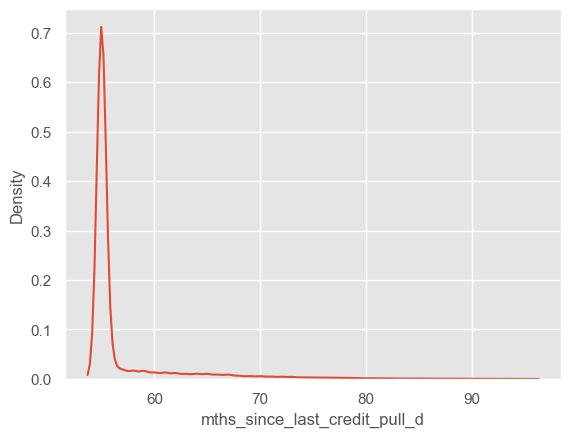

In [131]:
sns.kdeplot(data_ml['mths_since_last_credit_pull_d'])
skewness = skew(data_ml['mths_since_last_credit_pull_d'])
print(f"Skewness: {skewness}")

### Normalization/Standarization

In [132]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  object 
 3   home_ownership                 181686 non-null  object 
 4   annual_inc                     181686 non-null  float64
 5   verification_status            181686 non-null  object 
 6   purpose                        181686 non-null  object 
 7   addr_state                     181686 non-null  object 
 8   dti                            181686 non-null  float64
 9   inq_last_6mths                 181686 non-null  float64
 10  initial_list_status            181686 non-null  object 
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

1. Normalisasi dilakukan untuk mengatasi perbedaan skala data, karena normalisasi akan membawa data ke rentang yang seragam antara 0 dan 1. Hal ini akan membantu algoritma machine learning yang sensitif terhadap perbedaan skala dalam data, seperti regresi logistik dan k-nearest neighbors, untuk menghasilkan hasil yang lebih baik. Selain itu, normalisasi juga cocok untuk data dengan distribusi yang tidak normal atau bimodal.
2. Standarisasi karena memiliki distribusi mendekati normal. Standarisasi mengubah data menjadi distribusi normal standar dengan rata-rata 0 dan deviasi standar 1, sehingga memenuhi asumsi algoritma machine learning yang mengasumsikan distribusi normal. Dengan standarisasi, variabel-variabel ini akan memiliki dampak yang seimbang pada pemodelan.

In [133]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

data_ml['term'] = min_max_scaler.fit_transform(data_ml[['term']])
data_ml['annual_inc'] = min_max_scaler.fit_transform(data_ml[['annual_inc']])
data_ml['inq_last_6mths'] = min_max_scaler.fit_transform(data_ml[['inq_last_6mths']])
data_ml['out_prncp'] = min_max_scaler.fit_transform(data_ml[['out_prncp']])
data_ml['total_rec_int'] = min_max_scaler.fit_transform(data_ml[['total_rec_int']])
data_ml['tot_cur_bal'] = min_max_scaler.fit_transform(data_ml[['tot_cur_bal']])
data_ml['total_rev_hi_lim'] = min_max_scaler.fit_transform(data_ml[['total_rev_hi_lim']])
data_ml['earliest_cr_yr'] = min_max_scaler.fit_transform(data_ml[['earliest_cr_yr']])
data_ml['mths_since_last_credit_pull_d'] = min_max_scaler.fit_transform(data_ml[['mths_since_last_credit_pull_d']])

data_ml['int_rate'] = standard_scaler.fit_transform(data_ml[['int_rate']])
data_ml['dti'] = standard_scaler.fit_transform(data_ml[['dti']])
data_ml['mths_since_issue_date'] = standard_scaler.fit_transform(data_ml[['mths_since_issue_date']])

1. Melakukan normalisasi kolom yang memiliki distribusi skew > 0.5 atau > -0.5
2. Melakukan Standarisasi kolom yang memiliki distribusi normal antara 0.5 sampai dengan -0.5

## Feature Extraction

In [134]:
# Mengubah tipe data menjadi int
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

data_ml['grade'] = data_ml['grade'].map(grade_map)

In [135]:
# Impplementasi One-Hot Encoding untuk Variabel Kategori 
cat_cols = ['home_ownership', 'purpose', 'addr_state', 'verification_status', 'initial_list_status']
data_encoded = pd.get_dummies(data_ml, columns=cat_cols)

One-hot encoding digunakan untuk mengubah variabel kategori menjadi bentuk yang dapat diolah oleh model machine learning, dengan menggantikan variabel kategori tersebut menjadi kolom biner (0 atau 1) untuk setiap kategori yang mungkin. Ini diperlukan karena sebagian besar algoritma machine learning bekerja dengan data numerik dan tidak dapat menangani variabel kategori langsung. Dengan one-hot encoding, informasi kategori dapat diwakili secara numerik tanpa menimbulkan masalah interpretasi.

In [136]:
final_data = data_encoded

In [137]:
final_data

,term,int_rate,grade,annual_inc,dti,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,good_bad_loan,earliest_cr_yr,mths_since_issue_date,mths_since_last_credit_pull_d,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
42537,0.0,-1.841342,1,0.013474,-0.428892,0.142857,0.133755,8842.800000,0.050798,0.033455,0.00610,1,0.252525,0.275214,0.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
42538,0.0,-0.216324,2,0.004803,-0.057771,0.000000,0.000000,13359.770000,0.062261,0.001701,0.00080,1,0.292929,0.275214,0.000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
42539,0.0,-1.305157,1,0.007871,-0.112990,0.000000,0.170830,11431.200000,0.086102,0.034061,0.00153,1,0.292929,0.275214,0.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
42541,0.0,-0.376239,2,0.011206,-0.946408,0.000000,0.165339,11296.940000,0.117722,0.002209,0.00044,1,0.191919,0.275214,0.000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
42543,0.0,-1.124077,2,0.013074,-0.236269,0.000000,0.114710,7706.810000,0.062543,0.004893,0.00222,1,0.202020,0.275214,0.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466277,0.0,-1.540326,1,0.011473,-0.906599,0.000000,0.000000,5631.670000,0.048113,0.005324,0.00502,0,0.292929,0.138460,0.375,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
466278,0.0,0.893673,4,0.005069,-0.747363,0.000000,0.000000,12394.165200,0.109623,0.001271,0.00110,1,0.333333,0.138460,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
466282,1.0,0.597360,4,0.005603,1.060730,0.285714,0.452316,12343.980000,0.278035,0.009200,0.00130,1,0.323232,0.138460,0.025,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
466283,0.0,-1.540326,1,0.010539,-1.540972,0.142857,0.000000,2126.579838,0.005796,0.073951,0.00530,1,0.343434,0.138460,0.225,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

## Train dan Split

In [138]:
X = final_data.drop('good_bad_loan', axis = 1)
y = final_data['good_bad_loan']

In [139]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((145348, 85), (36338, 85))

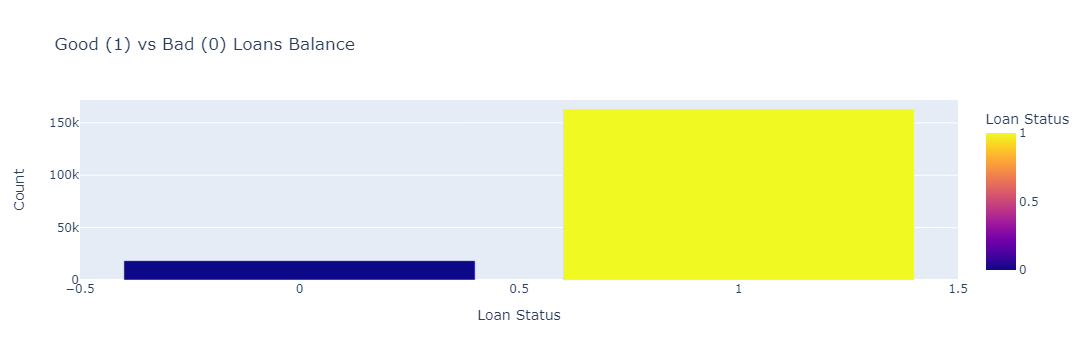

In [140]:
# Visualisasi distribusi good loans dan bad loans
df_visual = final_data.good_bad_loan.value_counts().reset_index()
df_visual.columns = ['Loan Status', 'Count']

fig = px.bar(df_visual, x='Loan Status', y='Count', title='Good (1) vs Bad (0) Loans Balance',
            labels={'Loan Status': 'Loan Status', 'Count': 'Count'},
            color='Loan Status', color_discrete_map={0: 'red', 1: 'green'})
fig.show()

In [141]:
y_train.value_counts()

1    130638
0     14710
Name: good_bad_loan, dtype: int64

## Imbalance Handling

SMOTE, atau Synthetic Minority Over-sampling Technique, digunakan untuk menangani ketidakseimbangan kelas dalam dataset. Ketidakseimbangan kelas dapat menyebabkan model memiliki kecenderungan untuk mendiskriminasi atau mengabaikan kelas minoritas, sehingga merugikan performa model dalam memprediksi kelas tersebut.

Dari visualisasi sebelumnya dapat diketahui bahwa ada ketidakseimbangan pada class, oleh karena itu over sampling menggunakan SMOTE digunakan sehingga menyamakan distribusi kelas dan diharapkan meningkatkan performa model pada kelas minoritas tersebut.

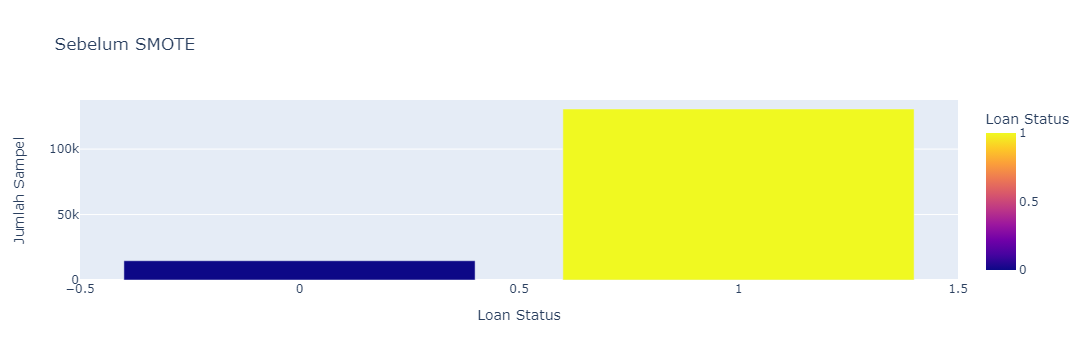

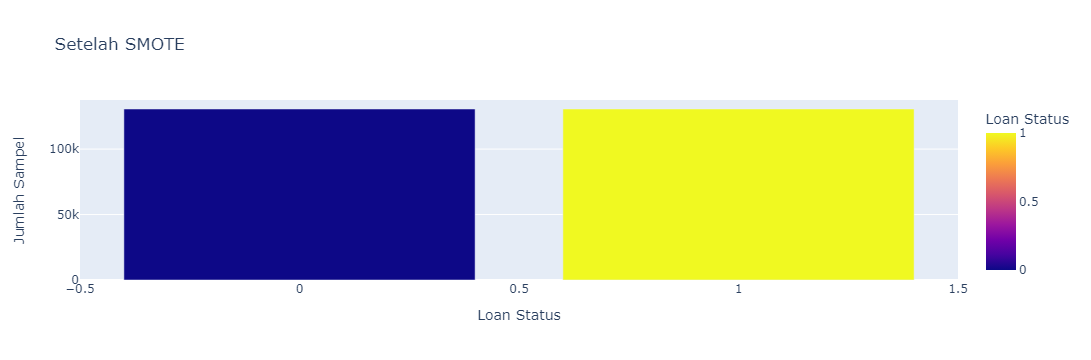

In [142]:
# Implementasi Smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

class_distribution_before = y_train.value_counts().reset_index()
class_distribution_before.columns = ['Loan Status', 'Count']

# Data setelah SMOTE
class_distribution_after = pd.Series(y_train_resampled).value_counts().reset_index()
class_distribution_after.columns = ['Loan Status', 'Count']

# Plotting distribusi kelas sebelum dan sesudah SMOTE menggunakan plotly.express
fig = px.bar(class_distribution_before, x='Loan Status', y='Count', title='Sebelum SMOTE',
            labels={'Loan Status': 'Loan Status', 'Count': 'Jumlah Sampel'},
            color='Loan Status', color_discrete_sequence=['red'])
fig.update_layout(showlegend=False)

fig2 = px.bar(class_distribution_after, x='Loan Status', y='Count', title='Setelah SMOTE',
            labels={'Loan Status': 'Loan Status', 'Count': 'Jumlah Sampel'},
            color='Loan Status', color_discrete_sequence=['blue'])
fig2.update_layout(showlegend=False)

fig.show()
fig2.show()

In [143]:
y_train_resampled.value_counts()

0    130638
1    130638
Name: good_bad_loan, dtype: int64

# Modeling

In [144]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [145]:
y_pred = random_forest.predict(X_test)

### Model Evaluation

In [146]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Akurasi: 0.9430073201607133
Presisi: 0.945490642608975
Recall: 0.993740027003805
F1-Score: 0.9690150959768996
AUC-ROC: 0.7479366801685692


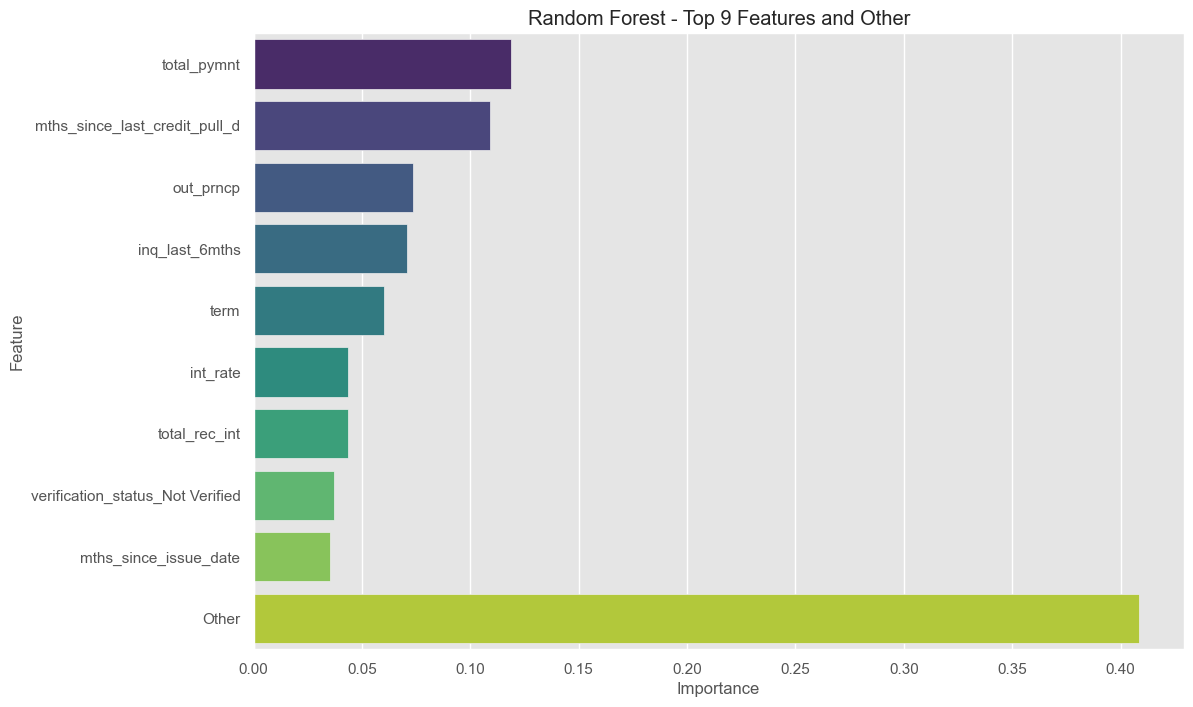

In [147]:
# Visualisasi fitur paling berpangruh pada model Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

feature_importance = random_forest.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 9
top_features = feature_importance_df_sorted.head(top_n)
other_features = pd.DataFrame({'Feature': ['Other'], 'Importance': [feature_importance_df_sorted['Importance'][top_n:].sum()]})

final_feature_importance_df = pd.concat([top_features, other_features])

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=final_feature_importance_df, palette='viridis')
plt.title('Random Forest - Top 9 Features and Other')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [148]:
# Membangun model Xgboost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    use_label_encoder=False, 
    random_state=42, 
)

xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi performa model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy_xgb)
print("Presisi:", precision_xgb)
print("Recall:", precision_xgb)
print("F1-Score:", f1_xgb)
print("AUC-ROC:", roc_auc_xgb)

Akurasi: 0.9725081182233475
Presisi: 0.9726203656602531
Recall: 0.9726203656602531
F1-Score: 0.9848652415652885
AUC-ROC: 0.9687016488687042


*SHAP (SHapley Additive exPlanations)*

Menggunakan visualisasi SHAP pada model yang menggunakan XGBoost karena SHAP dapat memberikan penjelasan yang lebih terperinci dan intuitif mengenai faktor-faktor apa yang berkontribusi terhadap prediksi suatu instance. Ini membantu analis atau praktisi machine learning dalam memahami dan menjelaskan hasil prediksi model, sehingga dapat diambil keputusan atau tindakan yang lebih terinformasi. Visualisasi SHAP juga dapat memberikan insight tentang bagaimana fitur-fitur tertentu berpengaruh terhadap hasil prediksi, sehingga dapat membantu dalam interpretasi dan tuning model.

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[15:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



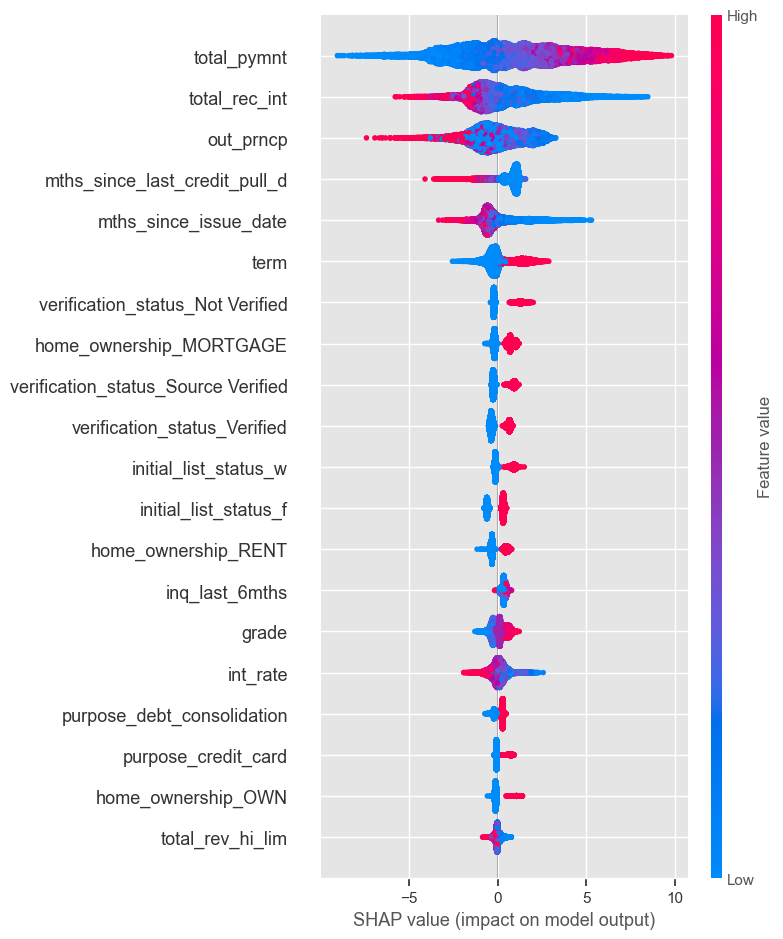

In [149]:
# Implementasi SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

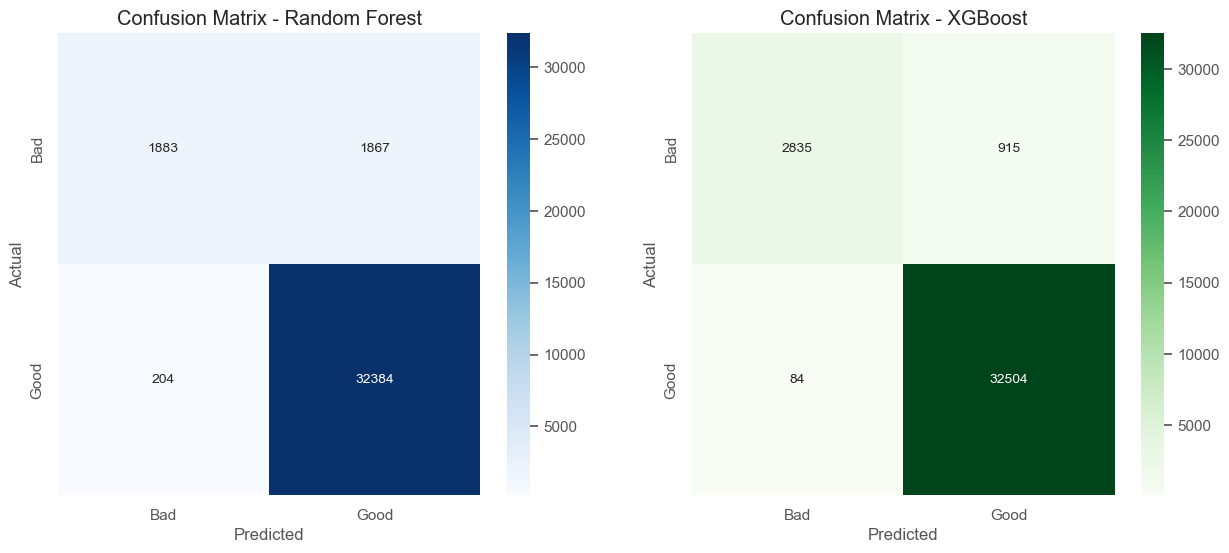

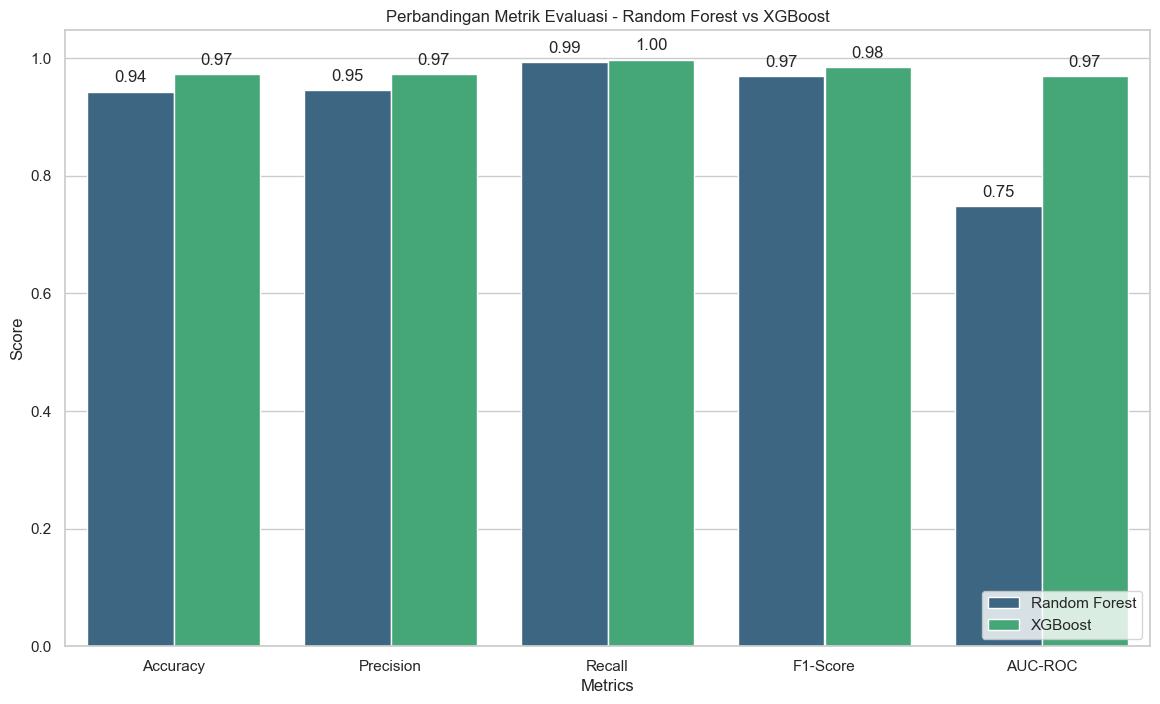

In [150]:
# Visualisasi Perbandingan Kinerja Model: Random Forest vs XGBoost
cm_rf = confusion_matrix(y_test, y_pred)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Confusion Matrix - Random Forest
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix - XGBoost
plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Visualisasi perbandingan metrik evaluasi
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_rf = [accuracy, precision, recall, f1, roc_auc]
metrics_xgb = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]

sns.set_theme(style="whitegrid")

data_vis = pd.DataFrame({
    'Metrics': metric_names,
    'Random Forest': metrics_rf,
    'XGBoost': metrics_xgb
})

data_melt = data_vis.melt(id_vars='Metrics', var_name='Model', value_name='Score')

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Metrics', y='Score', hue='Model', data=data_melt, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Perbandingan Metrik Evaluasi - Random Forest vs XGBoost')
plt.legend(loc='lower right') 
plt.show()

1. Visualisasi confusion matrix untuk memahami sejauh mana model dapat memprediksi dengan benar dan jenis kesalahan yang dibuat.
2. Perbandingan metrik evaluasi kinerja model, seperti akurasi, presisi, recall, F1-score, dan AUC-ROC, antara Random Forest dan XGBoost

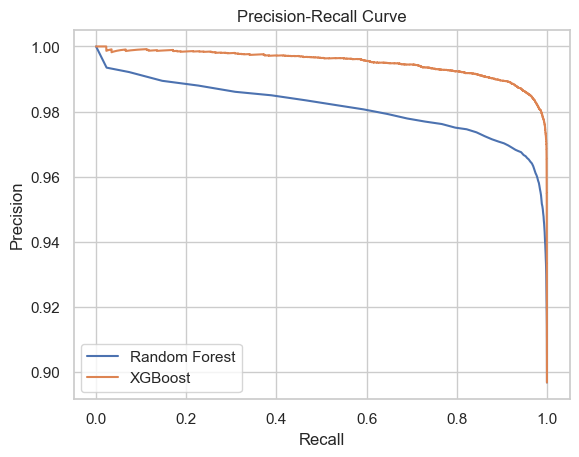

In [151]:
# Kurva Presisi-Recall Model Random Forest dan XGBoost
precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest')

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall_xgb, precision_xgb, label='XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Data Final Good Bad Loan Distribution:
1    163226
0     18460
Name: good_bad_loan, dtype: int64

Test Data Good Bad Loan Distribution:
1    33419
0     2919
Name: good_bad_loan, dtype: int64


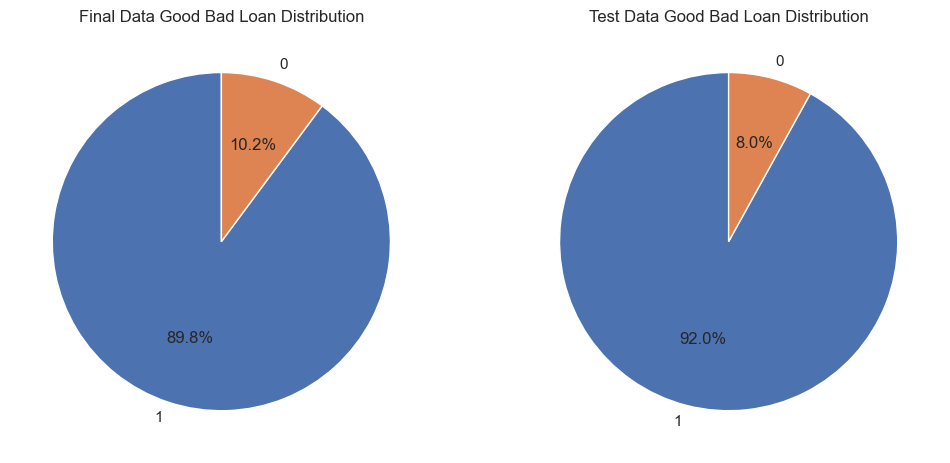

In [152]:
# Membandingkan good_bad_loan antara Data Final dengan Data test
y_pred_xgb_df = pd.DataFrame({'good_bad_loan': y_pred_xgb})

data_final = final_data['good_bad_loan'].value_counts()
print("\nData Final Good Bad Loan Distribution:")
print(data_final)

test_data_counts = y_pred_xgb_df['good_bad_loan'].value_counts()
print("\nTest Data Good Bad Loan Distribution:")
print(test_data_counts)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(final_data_counts, labels=final_data_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Final Data Good Bad Loan Distribution')

plt.subplot(1, 2, 2)
plt.pie(test_data_counts, labels=test_data_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Test Data Good Bad Loan Distribution')

plt.show()
